In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, PrecisionRecallDisplay, RocCurveDisplay,confusion_matrix

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
#PewData Read-in
file_path = "C:/1. Yuke/Master 1st semester/MMAI5000_AI/Group project AI Human/AI-Human-PewData.xlsx"
# Read the Excel file
df = pd.read_excel(file_path)

# Display the DataFrame to confirm it loaded correctly
df.head()

,Unnamed: 0,QKEY,INTERVIEW_START_W99,INTERVIEW_END_W99,DEVICE_TYPE_W99,LANG_W99,FORM_W99,XTABLET_W99,TECH1_W99,SC1_W99,...,F_PARTYLN_FINAL,F_PARTYSUM_FINAL,F_PARTYSUMIDEO_FINAL,F_INC_SDT1,F_REG,F_IDEO,F_INTFREQ,F_VOLSUM,F_INC_TIER2,WEIGHT_W99
0,0,100260,2021-11-03 14:25:27,2021-11-03 14:45:34,Laptop/PC,English,Form 2,Non-tablet HH,NaN,Mostly positive,...,NaN,Rep/Lean Rep,Conservative Rep/Lean,"$50,000 to less than $60,000",You are ABSOLUTELY CERTAIN that you are regist...,Very conservative,Several times a day,No,Middle income,0.206396
1,1,100314,2021-11-04 12:35:35,n,Smartphone,English,Form 1,Non-tablet HH,Mostly positive,NaN,...,NaN,Rep/Lean Rep,Moderate/Liberal Rep/Lean,"$40,000 to less than $50,000",You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Several times a day,Yes,Middle income,0.315090
2,2,100363,2021-11-03 20:23:43,2021-11-03 20:36:24,Smartphone,English,Form 1,Non-tablet HH,Mostly positive,NaN,...,NaN,Dem/Lean Dem,Moderate/Conservative Dem/Lean,"$100,000 or more",You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Several times a day,No,Upper income,0.829579
3,3,100598,2021-11-02 13:01:05,2021-11-04 12:37:42,Laptop/PC,English,Form 2,Non-tablet HH,NaN,Mostly positive,...,NaN,Rep/Lean Rep,Conservative Rep/Lean,"$100,000 or more",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Several times a day,Yes,Upper income,0.337527
4,4,100637,2021-11-02 12:32:58,2021-11-02 12:46:23,Laptop/PC,English,Form 2,Non-tablet HH,NaN,Equal positive and negative effects,...,The Republican Party,Rep/Lean Rep,Conservative Rep/Lean,"$30,000 to less than $40,000",You are ABSOLUTELY CERTAIN that you are regist...,Very conservative,Less often,No,Lower income,1.210606


### There are 215 columns in total.

#### The main focus of our proposal is on Chip Implant and Gene Editing, therefore, we are going to clean the dataset by dropping the columns that are not necessary to our main focus. 

In [4]:
# Drop the Interview start & end columns and Device type as they are less relevant to our group's focus 
df.drop(df.iloc[:, 2:5], inplace = True, axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10260 entries, 0 to 10259
Columns: 212 entries, Unnamed: 0 to WEIGHT_W99
dtypes: float64(1), int64(2), object(209)
memory usage: 16.6+ MB


In [5]:
# Drop tablet type and all other AI technology groups question codes (e.g. facial recognition technology, 
# driverless passenger vehicle)
# keep questions only for Gene Editing and Chip Implant technologies (our main focus)

df.drop(df.columns[[4] + list(range(35, 110)) + list(range(158, 179))], inplace = True, axis = 1)
df.info()

# Now the dataset contains columns that are necessary to our proposal focus 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10260 entries, 0 to 10259
Columns: 115 entries, Unnamed: 0 to WEIGHT_W99
dtypes: float64(1), int64(2), object(112)
memory usage: 9.0+ MB


In [6]:
# Check for missing values -- Notice there are missing values under question codes BCHIP  
bchip_columns = df.columns[df.columns.str.contains('BCHIP')]
null_counts = df[bchip_columns].isnull().sum()
null_counts

BCHIP1_W99       5153
BCHIP2_W99       5153
BCHIP3_W99       5153
BCHIP4_a_W99     5153
BCHIP4_b_W99     5153
BCHIP4_c_W99     5153
BCHIP4_d_W99     5153
BCHIP5_W99       5153
BCHIP6_W99       5153
BCHIP7_W99       5153
BCHIP8_W99       5153
BCHIP9_a_W99     5153
BCHIP9_b_W99     5153
BCHIP9_c_W99     5153
BCHIP10_a_W99    5153
BCHIP10_b_W99    5153
BCHIP10_c_W99    5153
BCHIP10_d_W99    5153
BCHIP11_W99      5153
BCHIP12_W99      5153
BCHIP13_a_W99    5153
BCHIP13_b_W99    5153
BCHIP14_a_W99    5153
BCHIP14_b_W99    5153
BCHIP14_c_W99    5153
BCHIP14_d_W99    5153
dtype: int64

In [7]:
# Check for missing values -- Notice there are missing values under question codes GENEV  
gene_columns = df.columns[df.columns.str.contains('GENEV')]
df[gene_columns].isnull().sum()

GENEV1_W99       5153
GENEV2_W99       5153
GENEV3_W99       5153
GENEV4_a_W99     5153
GENEV4_b_W99     5153
GENEV4_c_W99     5153
GENEV4_d_W99     5153
GENEV5_W99       5153
GENEV6_W99       5153
GENEV7_W99       5153
GENEV8_W99       5153
GENEV9_a_W99     5153
GENEV9_b_W99     5153
GENEV9_c_W99     5153
GENEV9_d_W99     5153
GENEV10_W99      5153
GENEV11_W99      5153
GENEV12_a_W99    5153
GENEV12_b_W99    5153
GENEV12_c_W99    5153
GENEV13_a_W99    5153
GENEV13_b_W99    5153
dtype: int64

In [8]:
# There are in total 5153 missing values under each column of BCHIP - 
# indicating 5153 participants did not answer any question of Chip Implant in this questionnaire, 
# we should consider dropping these rows since they did not provide any insight of Chip Implant
df_clean_1 = df.dropna(subset = bchip_columns)
df_clean_1[bchip_columns].isnull().sum()

BCHIP1_W99       0
BCHIP2_W99       0
BCHIP3_W99       0
BCHIP4_a_W99     0
BCHIP4_b_W99     0
BCHIP4_c_W99     0
BCHIP4_d_W99     0
BCHIP5_W99       0
BCHIP6_W99       0
BCHIP7_W99       0
BCHIP8_W99       0
BCHIP9_a_W99     0
BCHIP9_b_W99     0
BCHIP9_c_W99     0
BCHIP10_a_W99    0
BCHIP10_b_W99    0
BCHIP10_c_W99    0
BCHIP10_d_W99    0
BCHIP11_W99      0
BCHIP12_W99      0
BCHIP13_a_W99    0
BCHIP13_b_W99    0
BCHIP14_a_W99    0
BCHIP14_b_W99    0
BCHIP14_c_W99    0
BCHIP14_d_W99    0
dtype: int64

In [9]:
df_clean_1[gene_columns].isnull().sum()    #dataset that have Chip Implant questions cleaned 

# Use this cleaned dataset to check if there's still any missing values for Gene Editing columns 
# Notice there are none, indicating those 5153 participants who did not answer questions for Chip implant 
# also did not answer questions for Gene Editing 

# This is due to the reason all Form 1 respondants are only supposed to answer question regarding 
# social media companies, facial recognition and driveless passenger vehicle 

# Only Form 2 respondants got questions regarding Gene Editing and Chip Implants 

GENEV1_W99       0
GENEV2_W99       0
GENEV3_W99       0
GENEV4_a_W99     0
GENEV4_b_W99     0
GENEV4_c_W99     0
GENEV4_d_W99     0
GENEV5_W99       0
GENEV6_W99       0
GENEV7_W99       0
GENEV8_W99       0
GENEV9_a_W99     0
GENEV9_b_W99     0
GENEV9_c_W99     0
GENEV9_d_W99     0
GENEV10_W99      0
GENEV11_W99      0
GENEV12_a_W99    0
GENEV12_b_W99    0
GENEV12_c_W99    0
GENEV13_a_W99    0
GENEV13_b_W99    0
dtype: int64

In [10]:
df_clean_1.describe(include = 'all')

# The dataset now has 5107 rows to analyze

,Unnamed: 0,QKEY,LANG_W99,FORM_W99,TECH1_W99,SC1_W99,CNCEXC_W99,EXCITEOE_W99_OE1,EXCITEOE_W99_OE2,EXCITEOE_W99_OE3,...,F_PARTYLN_FINAL,F_PARTYSUM_FINAL,F_PARTYSUMIDEO_FINAL,F_INC_SDT1,F_REG,F_IDEO,F_INTFREQ,F_VOLSUM,F_INC_TIER2,WEIGHT_W99
count,5107.000000,5.107000e+03,5107,5107,0,5107,5107,964,161,29,...,1864,5107,5107,5107,4893,5107,5030,5107,5107,5107.000000
unique,NaN,NaN,2,1,0,4,4,13,11,8,...,3,3,5,10,4,6,6,3,4,NaN
top,NaN,NaN,English,Form 2,NaN,Mostly positive,Equally concerned and excited,"Makes life, society better","Saves time, more efficient",Helps with work/labor,...,The Democratic Party,Dem/Lean Dem,Conservative Rep/Lean,"$100,000 or more",You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Several times a day,No,Middle income,NaN
freq,NaN,NaN,4874,5107,NaN,3651,2330,286,36,9,...,872,2553,1711,1447,4389,1831,2320,3279,2501,NaN
mean,5129.626395,1.730272e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.006107
std,2970.325559,7.061264e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.283727
min,0.000000,1.002600e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004226
25%,2570.500000,2.017017e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.390985
50%,5150.000000,2.018011e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.603771
75%,7742.500000,2.019010e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.027352


# Separate the entire dataset into two datasets.
### One focusing on Chip Implant and one focusing on Gene Editing 

In [11]:
# Identifying the general columns -- demographic attributes columns (the ones that do not contain
# BCHIP or GENEV) 
general_columns = df_clean_1.columns[~df_clean_1.columns.str.contains('BCHIP|GENEV')]

In [12]:
df_bchip = df_clean_1[general_columns.union(bchip_columns)]
df_bchip.info()

# in this dataframe -- contains only Chip Implant questions and generic information (demographic attributes)
# by doing so, easier for the group to analyze these two technologies separately 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5107 entries, 0 to 10256
Data columns (total 93 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ALGFAIR_W99            5107 non-null   object 
 1   BCHIP10_a_W99          5107 non-null   object 
 2   BCHIP10_b_W99          5107 non-null   object 
 3   BCHIP10_c_W99          5107 non-null   object 
 4   BCHIP10_d_W99          5107 non-null   object 
 5   BCHIP11_W99            5107 non-null   object 
 6   BCHIP12_W99            5107 non-null   object 
 7   BCHIP13_a_W99          5107 non-null   object 
 8   BCHIP13_b_W99          5107 non-null   object 
 9   BCHIP14_a_W99          5107 non-null   object 
 10  BCHIP14_b_W99          5107 non-null   object 
 11  BCHIP14_c_W99          5107 non-null   object 
 12  BCHIP14_d_W99          5107 non-null   object 
 13  BCHIP1_W99             5107 non-null   object 
 14  BCHIP2_W99             5107 non-null   object 
 15  BCH

In [13]:
df_genev = df_clean_1[general_columns.union(gene_columns)]
df_genev.info()

# in this dataframe -- contains only Gene Editinng questions and generic information (demographic attributes)
# by doing so, easier for the group to analyze these two technologies separately 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5107 entries, 0 to 10256
Data columns (total 89 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ALGFAIR_W99            5107 non-null   object 
 1   CNCEXC_W99             5107 non-null   object 
 2   CONCERNOE_REFUSED_W99  5107 non-null   object 
 3   CONCERNOE_W99_OE1      1792 non-null   object 
 4   CONCERNOE_W99_OE2      325 non-null    object 
 5   CONCERNOE_W99_OE3      51 non-null     object 
 6   DISCRIM1_a_W99         5107 non-null   object 
 7   DISCRIM1_b_W99         5107 non-null   object 
 8   DISCRIM1_c_W99         5107 non-null   object 
 9   DISCRIM1_d_W99         5107 non-null   object 
 10  DISCRIM1_e_W99         5107 non-null   object 
 11  DISCRIM1_f_W99         5107 non-null   object 
 12  EXCITEOE_REFUSED_W99   5107 non-null   object 
 13  EXCITEOE_W99_OE1       964 non-null    object 
 14  EXCITEOE_W99_OE2       161 non-null    object 
 15  EXC

# Data Summaries for Validation

In [14]:
df_bchip.groupby('F_AGECAT')['QKEY'].count().sort_values()

F_AGECAT
Refused      18
18-29       438
50-64      1444
65+        1521
30-49      1686
Name: QKEY, dtype: int64

In [15]:
df_bchip.groupby('F_GENDER')['QKEY'].count().sort_values()

F_GENDER
Refused                11
In some other way      29
A man                2279
A woman              2788
Name: QKEY, dtype: int64

In [16]:
df_genev.groupby('F_INC_TIER2')['QKEY'].count().sort_values()

F_INC_TIER2
Refused           264
Lower income     1094
Upper income     1248
Middle income    2501
Name: QKEY, dtype: int64

In [17]:
df_genev.groupby('F_EDUCCAT2')['QKEY'].count().sort_values()

F_EDUCCAT2
Refused                              16
Less than high school               166
Associate's degree                  553
High school graduate                703
Some college, no degree            1066
Postgraduate                       1222
College graduate/some post grad    1381
Name: QKEY, dtype: int64

Trend Analysis

In [18]:
# Key demographic variables identified are:

# F_AGECAT (Age category)
# F_GENDER (Gender)
# F_EDUCCAT and F_EDUCCAT2 (Education categories)
# F_INC_SDT1 and F_INC_TIER2 (Income)

In [19]:
# Check the columns to identify demographic-related columns
genev_columns = df_genev.columns
bchip_columns = df_bchip.columns

demographic_columns_genev = [col for col in genev_columns if 'AGE' in col or 'GENDER' in col or 'EDUC' in col or 'INC' in col]
demographic_columns_bchip = [col for col in bchip_columns if 'AGE' in col or 'GENDER' in col or 'EDUC' in col or 'INC' in col]

demographic_columns_genev, demographic_columns_bchip

(['F_AGECAT',
  'F_EDUCCAT',
  'F_EDUCCAT2',
  'F_GENDER',
  'F_INC_SDT1',
  'F_INC_TIER2'],
 ['F_AGECAT',
  'F_EDUCCAT',
  'F_EDUCCAT2',
  'F_GENDER',
  'F_INC_SDT1',
  'F_INC_TIER2'])

## AI Perception

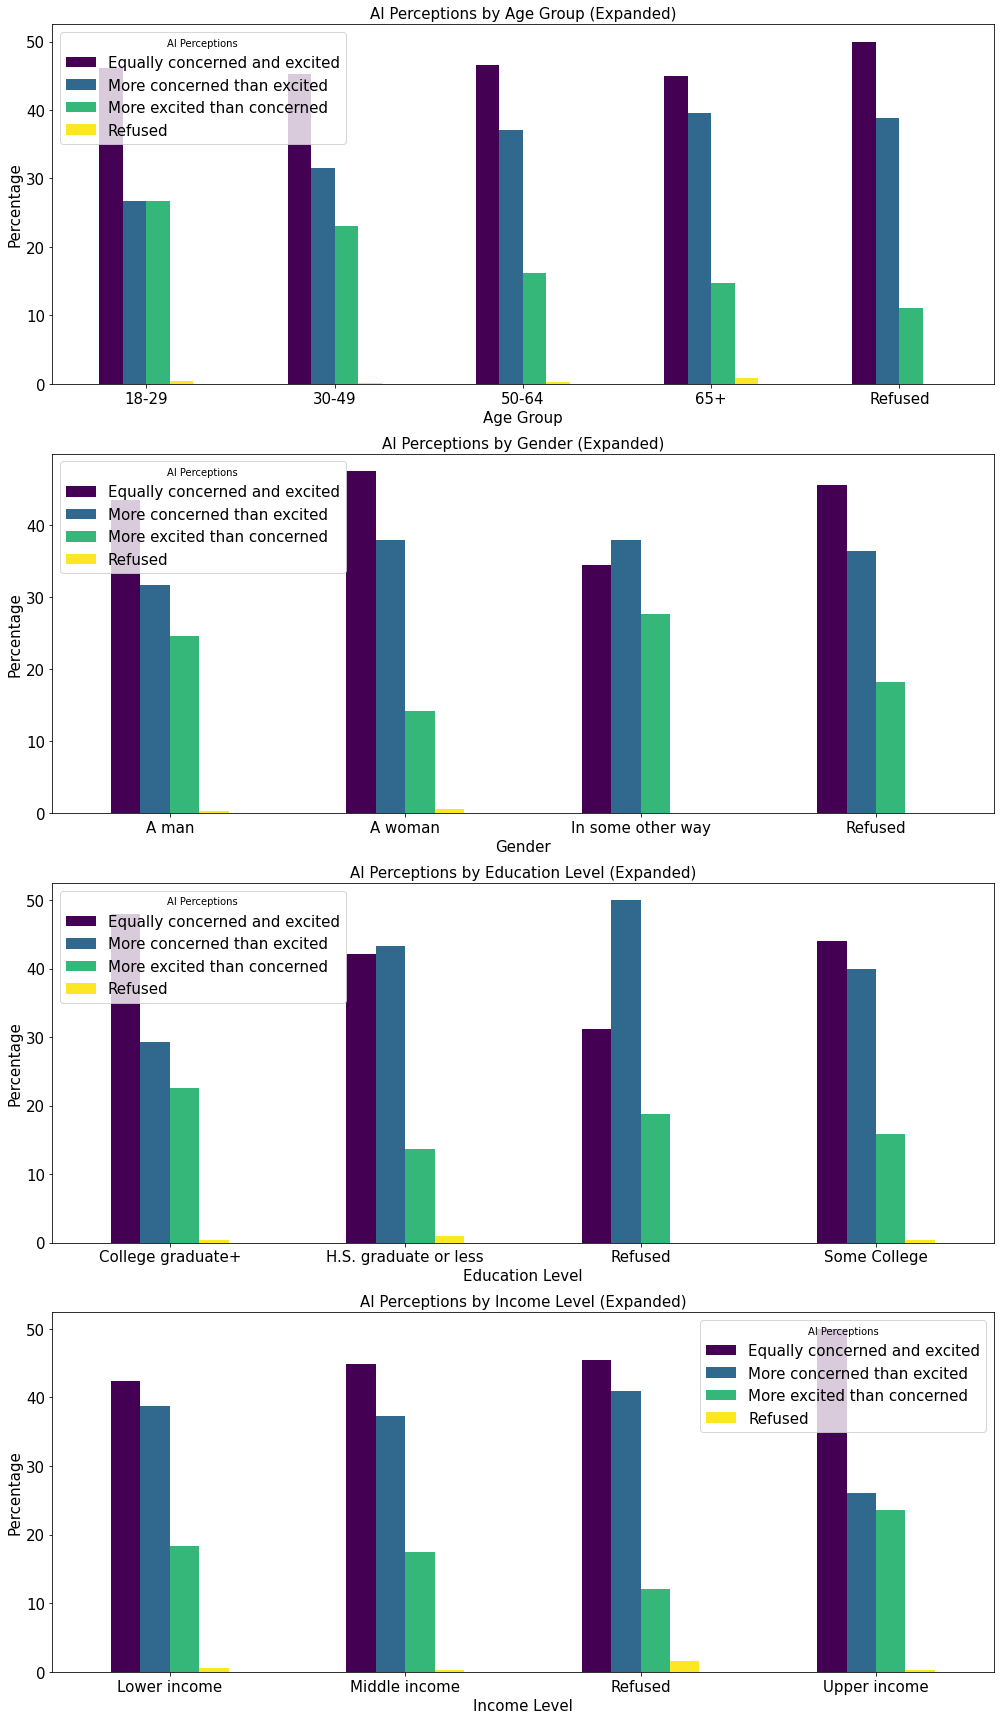

In [62]:
# Comprehensive AI Perceptions Analysis by Age
ai_age_groups_expanded = df_genev.groupby(['F_AGECAT', 'CNCEXC_W99']).size().unstack(fill_value=0)
ai_age_groups_percent_expanded = ai_age_groups_expanded.div(ai_age_groups_expanded.sum(axis=1), axis=0) * 100

# Comprehensive AI Perceptions Analysis by Gender
ai_gender_groups_expanded = df_genev.groupby(['F_GENDER', 'CNCEXC_W99']).size().unstack(fill_value=0)
ai_gender_groups_percent_expanded = ai_gender_groups_expanded.div(ai_gender_groups_expanded.sum(axis=1), axis=0) * 100

# Comprehensive AI Perceptions Analysis by Education
ai_education_groups_expanded = df_genev.groupby(['F_EDUCCAT', 'CNCEXC_W99']).size().unstack(fill_value=0)
ai_education_groups_percent_expanded = ai_education_groups_expanded.div(ai_education_groups_expanded.sum(axis=1), axis=0) * 100

# Comprehensive AI Perceptions Analysis by Income Level
ai_income_groups_expanded = df_genev.groupby(['F_INC_TIER2', 'CNCEXC_W99']).size().unstack(fill_value=0)
ai_income_groups_percent_expanded = ai_income_groups_expanded.div(ai_income_groups_expanded.sum(axis=1), axis=0) * 100

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(14, 24))

# Plot for Age Group
ai_age_groups_percent_expanded.plot(kind='bar', stacked=False, colormap='viridis', ax=axes[0], fontsize = 15)
axes[0].set_title('AI Perceptions by Age Group (Expanded)', fontsize = 15)
axes[0].set_xlabel('Age Group', fontsize = 15)
axes[0].set_ylabel('Percentage', fontsize = 15)
axes[0].legend(title='AI Perceptions', fontsize = 15)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0, fontsize = 15)

# Plot for Gender
ai_gender_groups_percent_expanded.plot(kind='bar', stacked=False, colormap='viridis', ax=axes[1], fontsize = 15)
axes[1].set_title('AI Perceptions by Gender (Expanded)', fontsize = 15)
axes[1].set_xlabel('Gender', fontsize = 15)
axes[1].set_ylabel('Percentage', fontsize = 15)
axes[1].legend(title='AI Perceptions', fontsize = 15)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0, fontsize = 15)

# Plot for Education Level
ai_education_groups_percent_expanded.plot(kind='bar', stacked=False, colormap='viridis', ax=axes[2], fontsize = 15)
axes[2].set_title('AI Perceptions by Education Level (Expanded)', fontsize = 15)
axes[2].set_xlabel('Education Level', fontsize = 15)
axes[2].set_ylabel('Percentage', fontsize = 15)
axes[2].legend(title='AI Perceptions', fontsize = 15)
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=0)

# Plot for Income Level
ai_income_groups_percent_expanded.plot(kind='bar', stacked=False, colormap='viridis', ax=axes[3], fontsize = 15)
axes[3].set_title('AI Perceptions by Income Level (Expanded)', fontsize = 15)
axes[3].set_xlabel('Income Level', fontsize = 15)
axes[3].set_ylabel('Percentage', fontsize = 15)
axes[3].legend(title='AI Perceptions', fontsize = 15)
axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=0)


plt.tight_layout()
plt.show()


## Chip Implant

In [ ]:
print("Brain Chip")
print("Logistic Regression")
print("  Accuracy:", bchip_log_reg_accuracy)
print("  F1 Score:", bchip_log_reg_f1)
print("  Recall:", bchip_log_reg_recall)
print("  Precision:", bchip_log_reg_precision)
print("Decision Tree")
print("  Accuracy:", bchip_decision_tree_accuracy)
print("  F1 Score:", bchip_decision_tree_reg_f1)
print("  Recall:", bchip_decision_tree_reg_recall)
print("  Precision:", bchip_decision_tree_reg_precision)
print("Random Forest")
print("  Accuracy:", bchip_random_forest_accuracy)
print("  F1 Score:", bchip_random_forest_reg_f1)
print("  Recall:", bchip_random_forest_reg_recall)
print("  Precision:", bchip_random_forest_reg_precision)

Brain Chip
Logistic Regression
  Accuracy: 0.6979778212654925
  F1 Score: 0.6522001664637482
  Recall: 0.6581865622961514
  Precision: 0.6522109956629516
Decision Tree
  Accuracy: 0.6131767775603392
  F1 Score: 0.6136770896387767
  Recall: 0.6131767775603392
  Precision: 0.6145353847576926
Random Forest
  Accuracy: 0.7103718199608611
  F1 Score: 0.6961770783704581
  Recall: 0.7103718199608611
  Precision: 0.7009395176523955


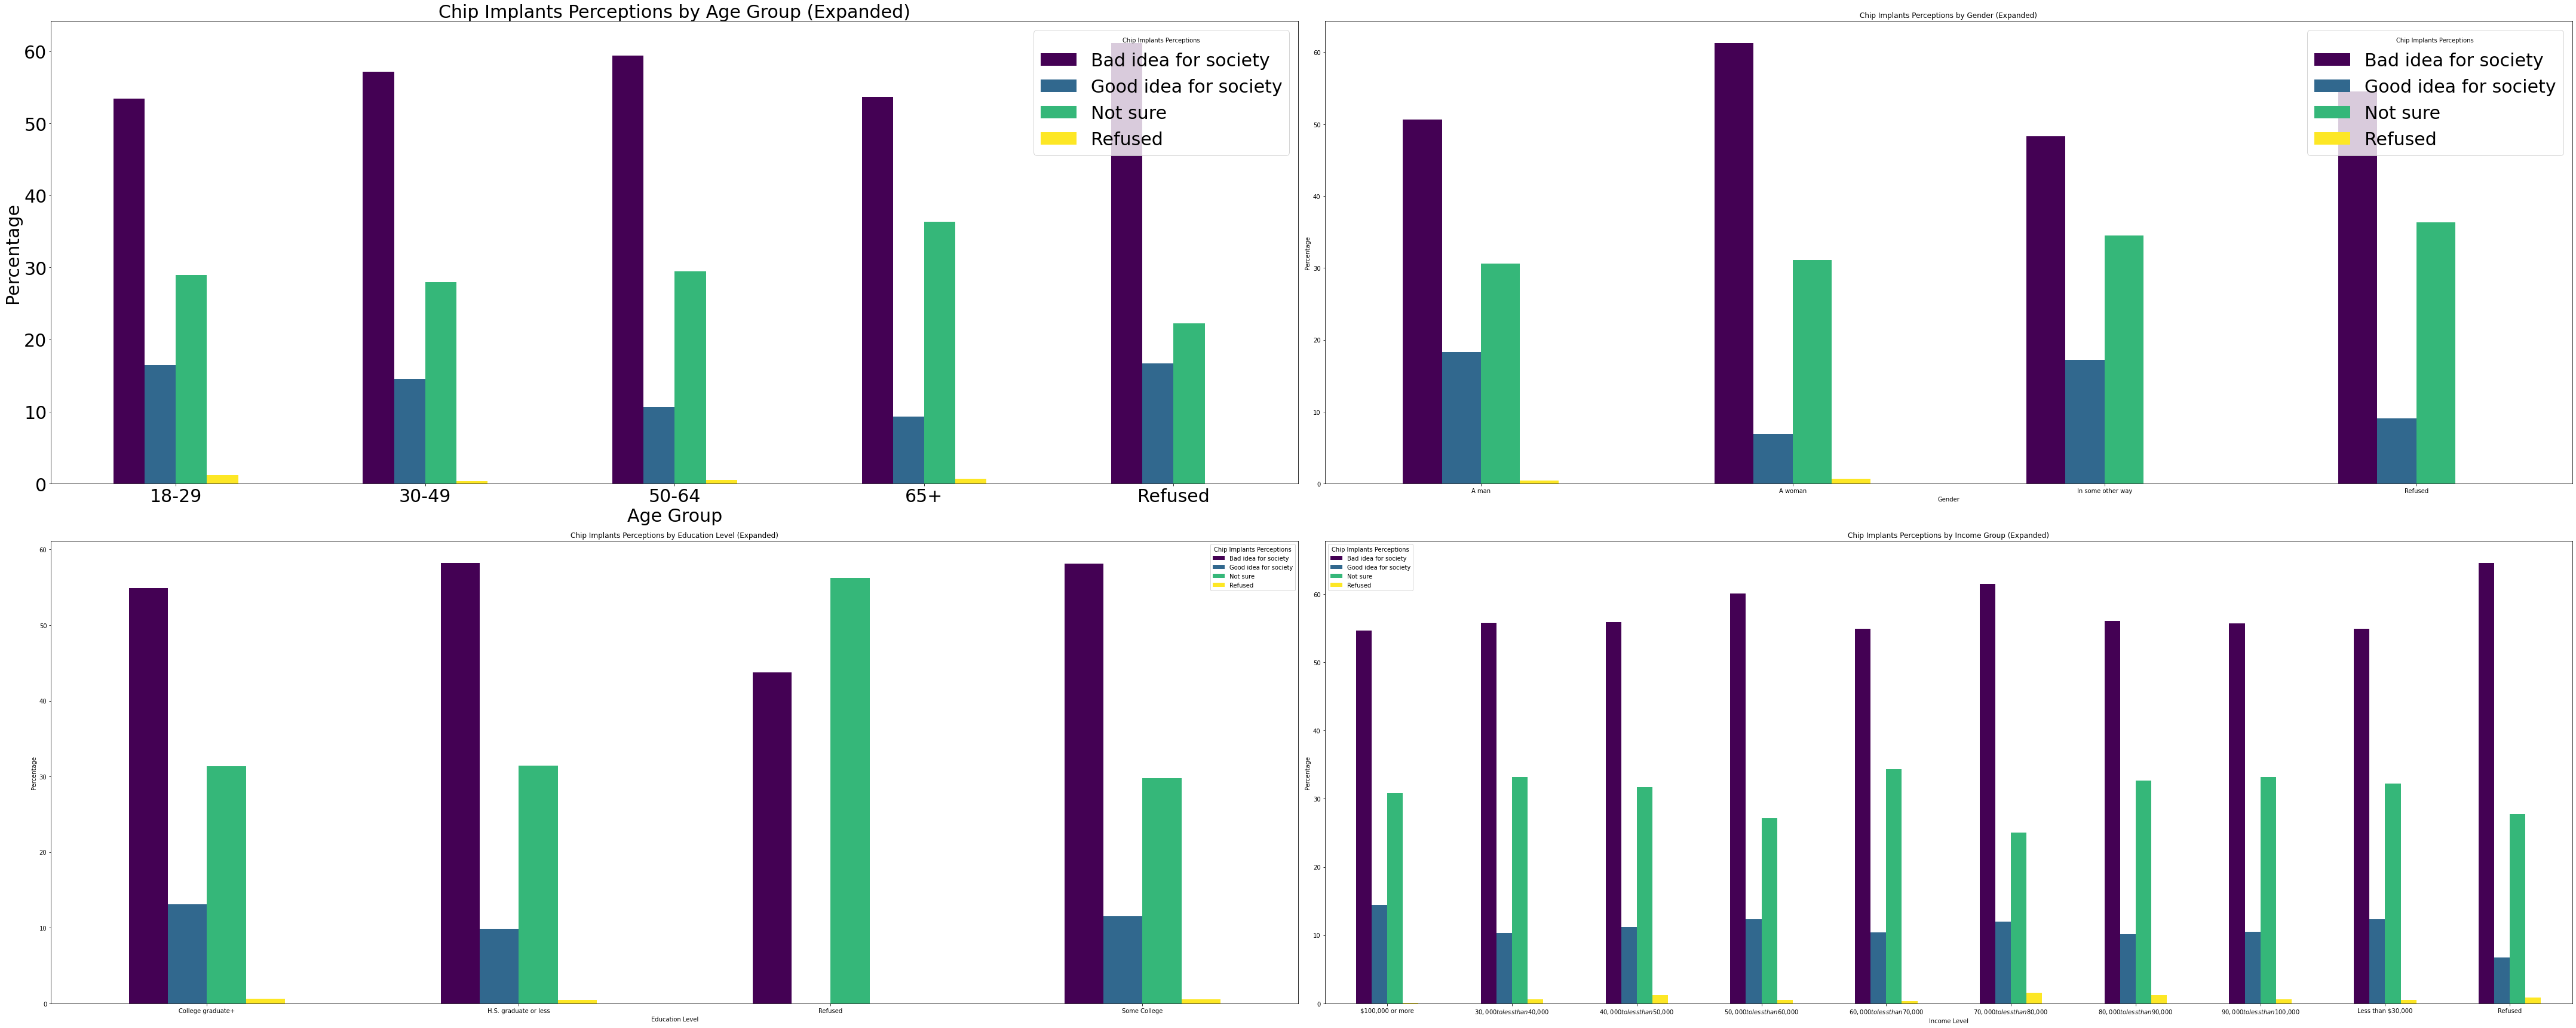

In [58]:
# Comprehensive Chip Implants Analysis by Age
chip_age_groups_expanded = df_bchip.groupby(['F_AGECAT', 'BCHIP2_W99']).size().unstack(fill_value=0)
chip_age_groups_percent_expanded = chip_age_groups_expanded.div(chip_age_groups_expanded.sum(axis=1), axis=0) * 100

# Comprehensive Chip Implants Analysis by Gender
chip_gender_groups_expanded = df_bchip.groupby(['F_GENDER', 'BCHIP2_W99']).size().unstack(fill_value=0)
chip_gender_groups_percent_expanded = chip_gender_groups_expanded.div(chip_gender_groups_expanded.sum(axis=1), axis=0) * 100

# Comprehensive Chip Implants Analysis by Education
chip_education_groups_expanded = df_bchip.groupby(['F_EDUCCAT', 'BCHIP2_W99']).size().unstack(fill_value=0)
chip_education_groups_percent_expanded = chip_education_groups_expanded.div(chip_education_groups_expanded.sum(axis=1), axis=0) * 100

# Comprehensive Chip Implants Analysis by Income Group
chip_inc_groups_expanded = df_bchip.groupby(['F_INC_SDT1', 'BCHIP2_W99']).size().unstack(fill_value=0)
chip_inc_groups_percent_expanded = chip_inc_groups_expanded.div(chip_inc_groups_expanded.sum(axis=1), axis=0) * 100

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(60, 24))

# Plot for Age Group
chip_age_groups_percent_expanded.plot(kind='bar', stacked=False, colormap='viridis', ax=axes[0, 0], fontsize = 30)
axes[0, 0].set_title('Chip Implants Perceptions by Age Group (Expanded)', fontsize = 30)
axes[0, 0].set_xlabel('Age Group', fontsize = 30)
axes[0, 0].set_ylabel('Percentage', fontsize = 30)
axes[0, 0].legend(title='Chip Implants Perceptions', fontsize = 30)
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)

# Plot for Gender
chip_gender_groups_percent_expanded.plot(kind='bar', stacked=False, colormap='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Chip Implants Perceptions by Gender (Expanded)')
axes[0, 1].set_xlabel('Gender', )
axes[0, 1].set_ylabel('Percentage')
axes[0, 1].legend(title='Chip Implants Perceptions', fontsize = 30)
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)

# Plot for Education Level
chip_education_groups_percent_expanded.plot(kind='bar', stacked=False, colormap='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Chip Implants Perceptions by Education Level (Expanded)')
axes[1, 0].set_xlabel('Education Level')
axes[1, 0].set_ylabel('Percentage')
axes[1, 0].legend(title='Chip Implants Perceptions')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0)

# Plot for Income Group
chip_inc_groups_percent_expanded.plot(kind='bar', stacked=False, colormap='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Chip Implants Perceptions by Income Group (Expanded)')
axes[1, 1].set_xlabel('Income Level')
axes[1, 1].set_ylabel('Percentage')
axes[1, 1].legend(title='Chip Implants Perceptions')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

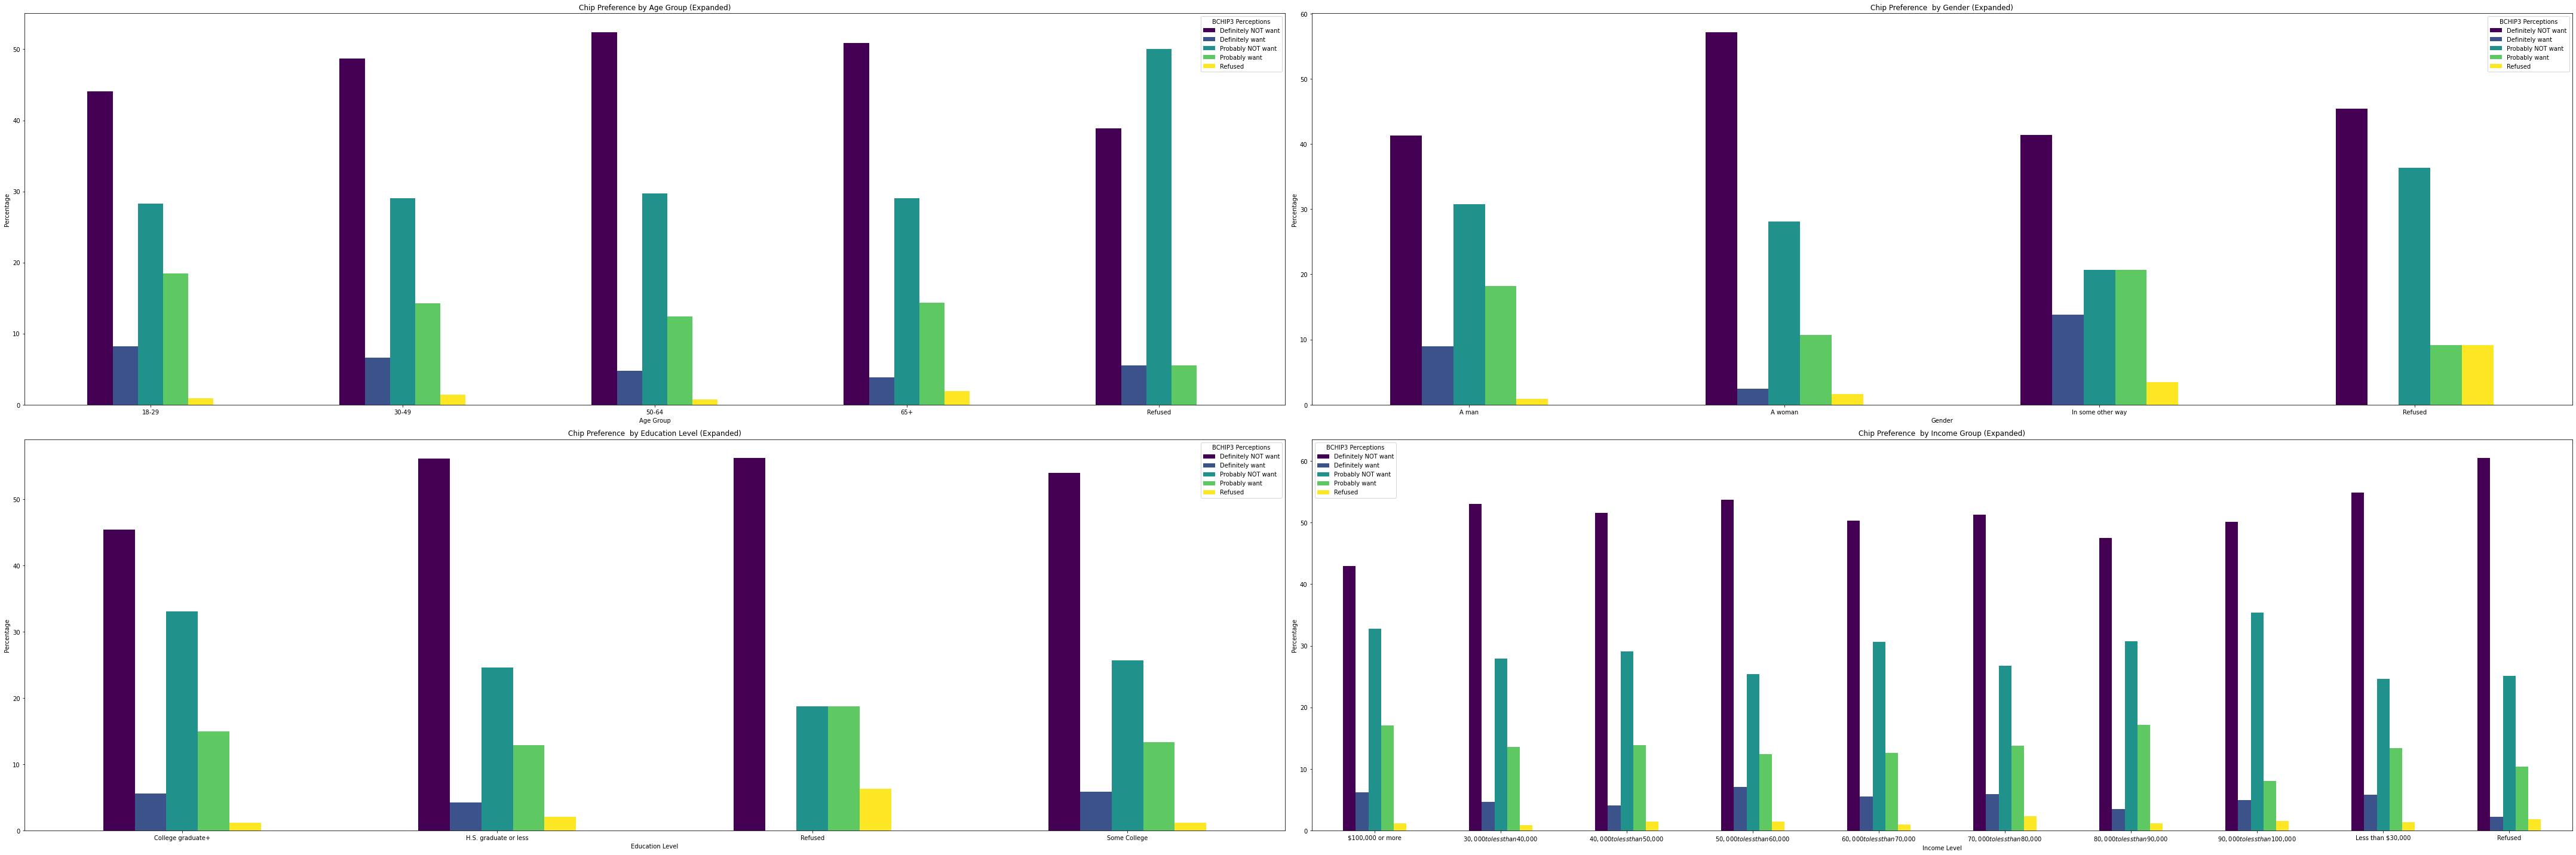

In [22]:
# BCHIP3_W99 Analysis

# Analysis by Age
chip3_age_groups_expanded = df_bchip.groupby(['F_AGECAT', 'BCHIP3_W99']).size().unstack(fill_value=0)
chip3_age_groups_percent_expanded = chip3_age_groups_expanded.div(chip3_age_groups_expanded.sum(axis=1), axis=0) * 100

# Analysis by Gender
chip3_gender_groups_expanded = df_bchip.groupby(['F_GENDER', 'BCHIP3_W99']).size().unstack(fill_value=0)
chip3_gender_groups_percent_expanded = chip3_gender_groups_expanded.div(chip3_gender_groups_expanded.sum(axis=1), axis=0) * 100

# Analysis by Education
chip3_education_groups_expanded = df_bchip.groupby(['F_EDUCCAT', 'BCHIP3_W99']).size().unstack(fill_value=0)
chip3_education_groups_percent_expanded = chip3_education_groups_expanded.div(chip3_education_groups_expanded.sum(axis=1), axis=0) * 100

# Analysis by Income Group
chip3_inc_groups_expanded = df_bchip.groupby(['F_INC_SDT1', 'BCHIP3_W99']).size().unstack(fill_value=0)
chip3_inc_groups_percent_expanded = chip3_inc_groups_expanded.div(chip3_inc_groups_expanded.sum(axis=1), axis=0) * 100

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(60, 20))

# Plot for Age Group
chip3_age_groups_percent_expanded.plot(kind='bar', stacked=False, colormap='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Chip Preference by Age Group (Expanded)')
axes[0, 0].set_xlabel('Age Group')
axes[0, 0].set_ylabel('Percentage')
axes[0, 0].legend(title='BCHIP3 Perceptions')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)

# Plot for Gender
chip3_gender_groups_percent_expanded.plot(kind='bar', stacked=False, colormap='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Chip Preference  by Gender (Expanded)')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Percentage')
axes[0, 1].legend(title='BCHIP3 Perceptions')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)

# Plot for Education Level
chip3_education_groups_percent_expanded.plot(kind='bar', stacked=False, colormap='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Chip Preference  by Education Level (Expanded)')
axes[1, 0].set_xlabel('Education Level')
axes[1, 0].set_ylabel('Percentage')
axes[1, 0].legend(title='BCHIP3 Perceptions')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0)

# Plot for Income Group
chip3_inc_groups_percent_expanded.plot(kind='bar', stacked=False, colormap='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Chip Preference  by Income Group (Expanded)')
axes[1, 1].set_xlabel('Income Level')
axes[1, 1].set_ylabel('Percentage')
axes[1, 1].legend(title='BCHIP3 Perceptions')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

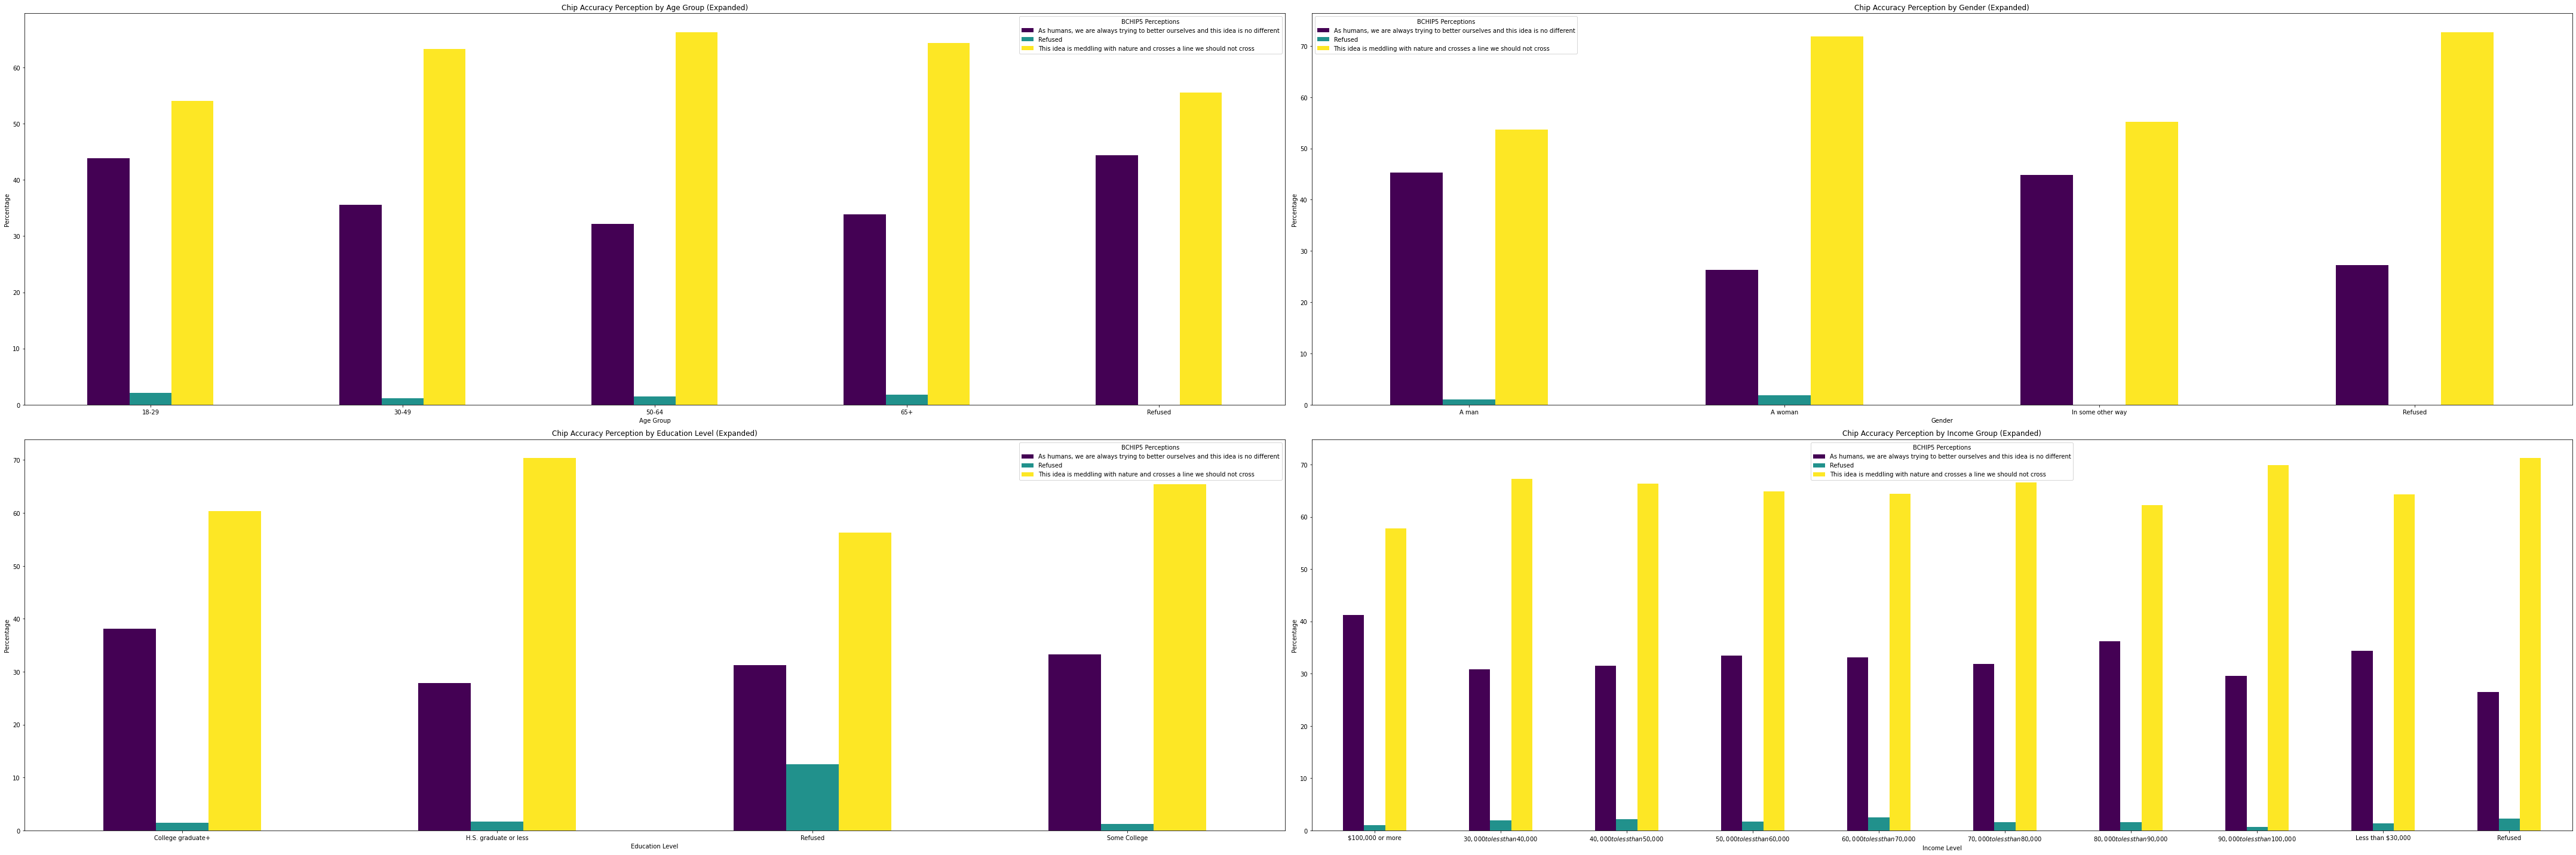

In [23]:
# BCHIP5_W99 Analysis

# Analysis by Age
chip5_age_groups_expanded = df_bchip.groupby(['F_AGECAT', 'BCHIP5_W99']).size().unstack(fill_value=0)
chip5_age_groups_percent_expanded = chip5_age_groups_expanded.div(chip5_age_groups_expanded.sum(axis=1), axis=0) * 100

# Analysis by Gender
chip5_gender_groups_expanded = df_bchip.groupby(['F_GENDER', 'BCHIP5_W99']).size().unstack(fill_value=0)
chip5_gender_groups_percent_expanded = chip5_gender_groups_expanded.div(chip5_gender_groups_expanded.sum(axis=1), axis=0) * 100

# Analysis by Education
chip5_education_groups_expanded = df_bchip.groupby(['F_EDUCCAT', 'BCHIP5_W99']).size().unstack(fill_value=0)
chip5_education_groups_percent_expanded = chip5_education_groups_expanded.div(chip5_education_groups_expanded.sum(axis=1), axis=0) * 100

# Analysis by Income Group
chip5_inc_groups_expanded = df_bchip.groupby(['F_INC_SDT1', 'BCHIP5_W99']).size().unstack(fill_value=0)
chip5_inc_groups_percent_expanded = chip5_inc_groups_expanded.div(chip5_inc_groups_expanded.sum(axis=1), axis=0) * 100

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(60, 20))

# Plot for Age Group
chip5_age_groups_percent_expanded.plot(kind='bar', stacked=False, colormap='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Chip Accuracy Perception by Age Group (Expanded)')
axes[0, 0].set_xlabel('Age Group')
axes[0, 0].set_ylabel('Percentage')
axes[0, 0].legend(title='BCHIP5 Perceptions')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)

# Plot for Gender
chip5_gender_groups_percent_expanded.plot(kind='bar', stacked=False, colormap='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Chip Accuracy Perception by Gender (Expanded)')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Percentage')
axes[0, 1].legend(title='BCHIP5 Perceptions')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)

# Plot for Education Level
chip5_education_groups_percent_expanded.plot(kind='bar', stacked=False, colormap='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Chip Accuracy Perception by Education Level (Expanded)')
axes[1, 0].set_xlabel('Education Level')
axes[1, 0].set_ylabel('Percentage')
axes[1, 0].legend(title='BCHIP5 Perceptions')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0)

# Plot for Income Group
chip5_inc_groups_percent_expanded.plot(kind='bar', stacked=False, colormap='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Chip Accuracy Perception by Income Group (Expanded)')
axes[1, 1].set_xlabel('Income Level')
axes[1, 1].set_ylabel('Percentage')
axes[1, 1].legend(title='BCHIP5 Perceptions')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

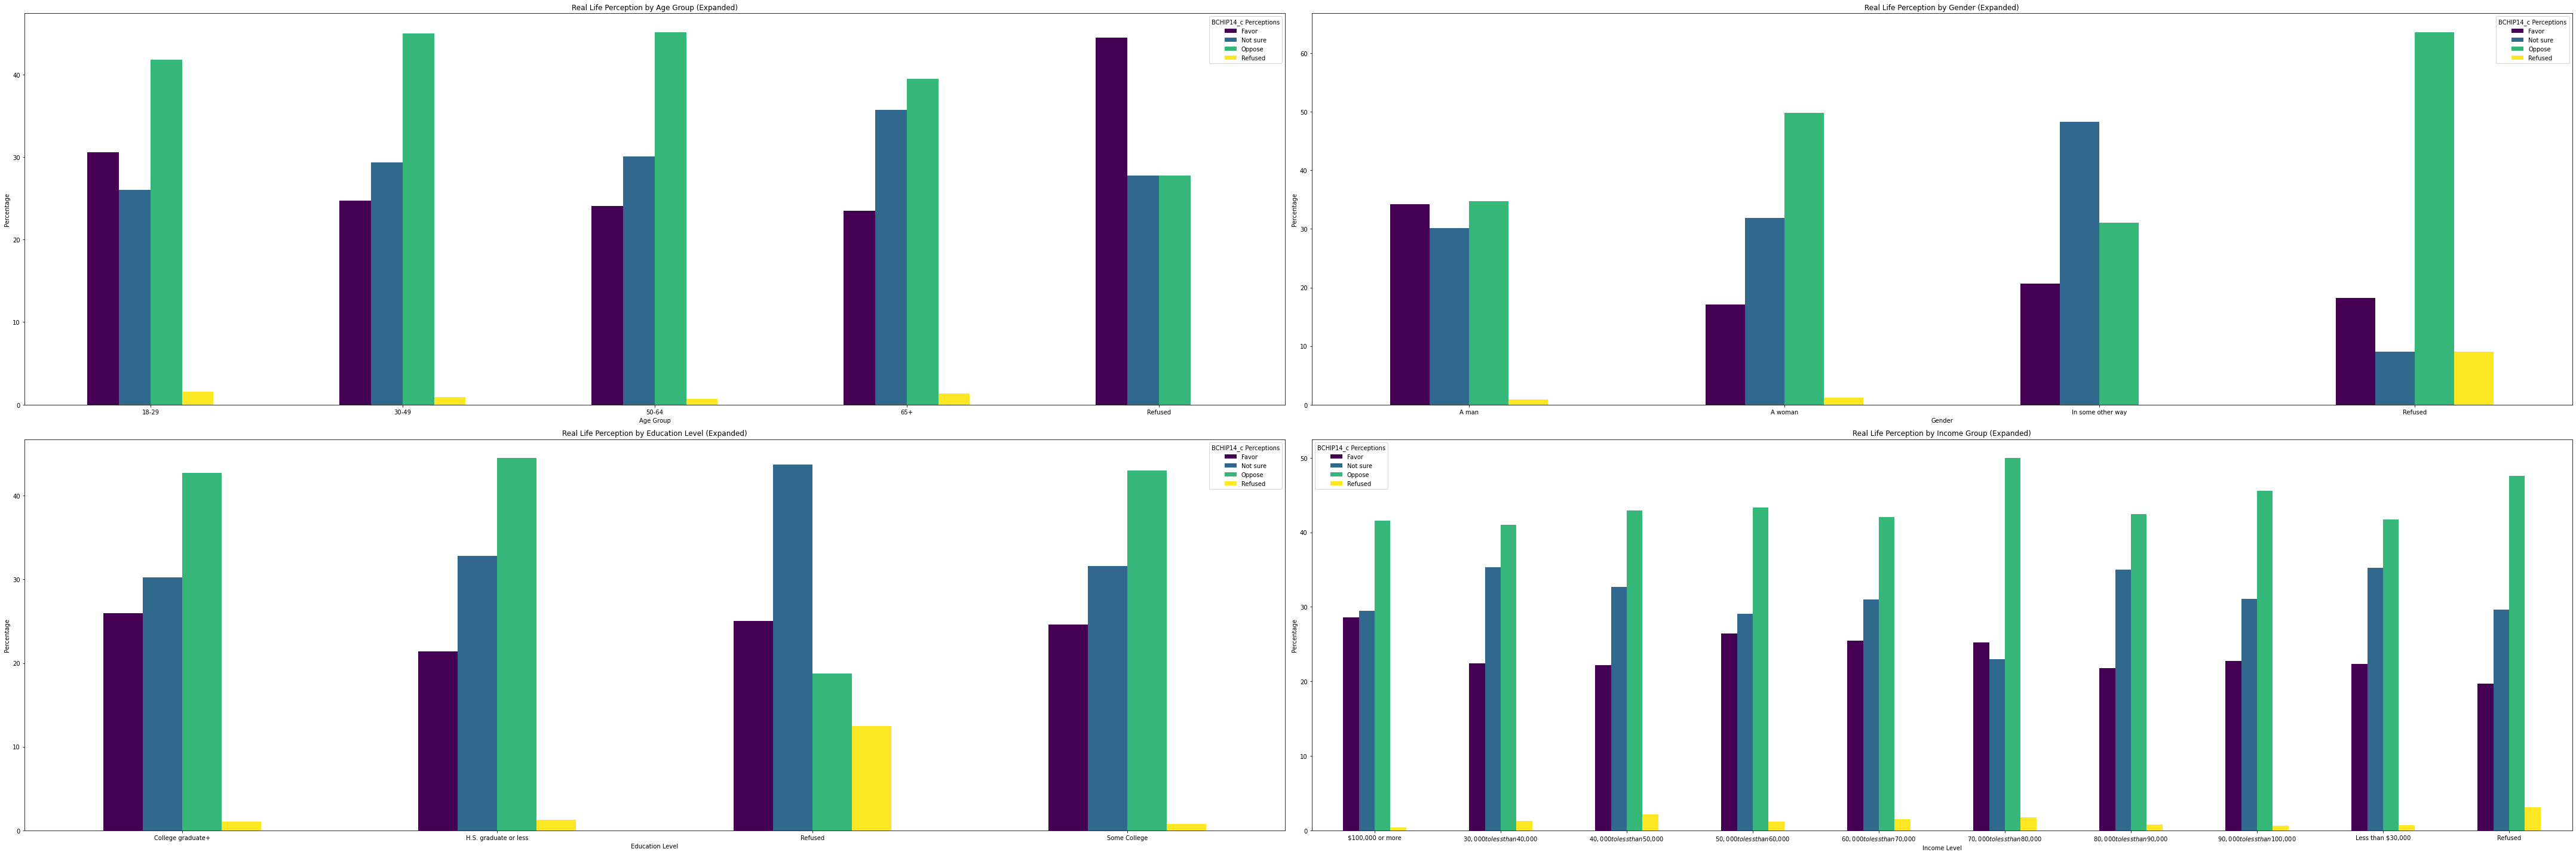

In [24]:
# BCHIP14_c_W99 Analysis

# Analysis by Age
chip14_age_groups_expanded = df_bchip.groupby(['F_AGECAT', 'BCHIP14_c_W99']).size().unstack(fill_value=0)
chip14_age_groups_percent_expanded = chip14_age_groups_expanded.div(chip14_age_groups_expanded.sum(axis=1), axis=0) * 100

# Analysis by Gender
chip14_gender_groups_expanded = df_bchip.groupby(['F_GENDER', 'BCHIP14_c_W99']).size().unstack(fill_value=0)
chip14_gender_groups_percent_expanded = chip14_gender_groups_expanded.div(chip14_gender_groups_expanded.sum(axis=1), axis=0) * 100

# Analysis by Education
chip14_education_groups_expanded = df_bchip.groupby(['F_EDUCCAT', 'BCHIP14_c_W99']).size().unstack(fill_value=0)
chip14_education_groups_percent_expanded = chip14_education_groups_expanded.div(chip14_education_groups_expanded.sum(axis=1), axis=0) * 100

# Analysis by Income Group
chip14_inc_groups_expanded = df_bchip.groupby(['F_INC_SDT1', 'BCHIP14_c_W99']).size().unstack(fill_value=0)
chip14_inc_groups_percent_expanded = chip14_inc_groups_expanded.div(chip14_inc_groups_expanded.sum(axis=1), axis=0) * 100

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(60, 20))

# Plot for Age Group
chip14_age_groups_percent_expanded.plot(kind='bar', stacked=False, colormap='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Real Life Perception by Age Group (Expanded)')
axes[0, 0].set_xlabel('Age Group')
axes[0, 0].set_ylabel('Percentage')
axes[0, 0].legend(title='BCHIP14_c Perceptions')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)

# Plot for Gender
chip14_gender_groups_percent_expanded.plot(kind='bar', stacked=False, colormap='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Real Life Perception by Gender (Expanded)')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Percentage')
axes[0, 1].legend(title='BCHIP14_c Perceptions')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)

# Plot for Education Level
chip14_education_groups_percent_expanded.plot(kind='bar', stacked=False, colormap='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Real Life Perception by Education Level (Expanded)')
axes[1, 0].set_xlabel('Education Level')
axes[1, 0].set_ylabel('Percentage')
axes[1, 0].legend(title='BCHIP14_c Perceptions')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0)

# Plot for Income Group
chip14_inc_groups_percent_expanded.plot(kind='bar', stacked=False, colormap='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Real Life Perception by Income Group (Expanded)')
axes[1, 1].set_xlabel('Income Level')
axes[1, 1].set_ylabel('Percentage')
axes[1, 1].legend(title='BCHIP14_c Perceptions')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

## Gene Editing

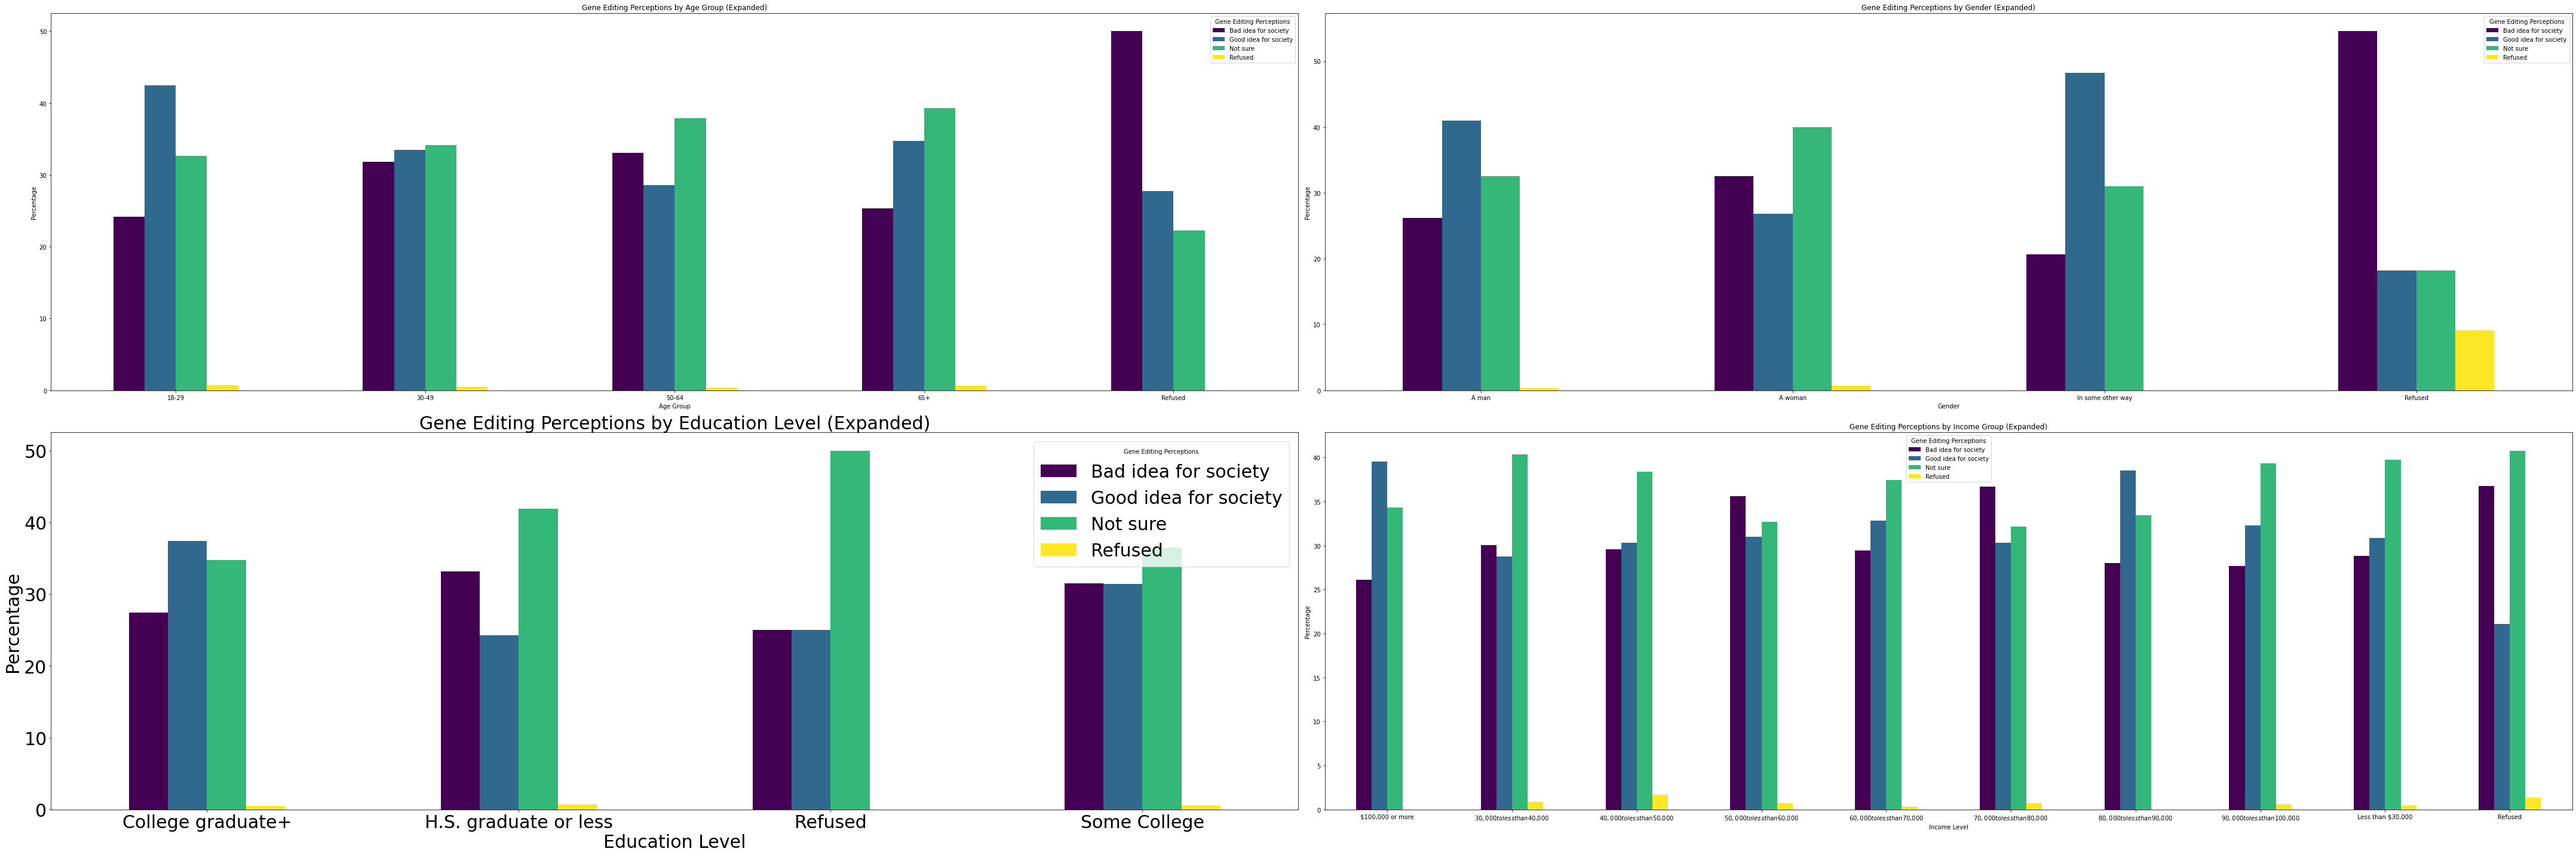

In [59]:
# Comprehensive Gene Editing Analysis by Age
gene_editing_age_groups_expanded = df_genev.groupby(['F_AGECAT', 'GENEV2_W99']).size().unstack(fill_value=0)
gene_editing_age_groups_percent_expanded = gene_editing_age_groups_expanded.div(gene_editing_age_groups_expanded.sum(axis=1), axis=0) * 100

# Comprehensive Gene Editing Analysis by Gender
gene_editing_gender_groups_expanded = df_genev.groupby(['F_GENDER', 'GENEV2_W99']).size().unstack(fill_value=0)
gene_editing_gender_groups_percent_expanded = gene_editing_gender_groups_expanded.div(gene_editing_gender_groups_expanded.sum(axis=1), axis=0) * 100

# Comprehensive Gene Editing Analysis by Education
gene_editing_education_groups_expanded = df_genev.groupby(['F_EDUCCAT', 'GENEV2_W99']).size().unstack(fill_value=0)
gene_editing_education_groups_percent_expanded = gene_editing_education_groups_expanded.div(gene_editing_education_groups_expanded.sum(axis=1), axis=0) * 100

# Comprehensive Gene Editing Analysis by Income Group
gene_editing_inc_groups_expanded = df_genev.groupby(['F_INC_SDT1', 'GENEV2_W99']).size().unstack(fill_value=0)
gene_editing_inc_groups_percent_expanded = gene_editing_inc_groups_expanded.div(gene_editing_inc_groups_expanded.sum(axis=1), axis=0) * 100

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(60, 20))

# Plot for Age Group
gene_editing_age_groups_percent_expanded.plot(kind='bar', stacked=False, colormap='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Gene Editing Perceptions by Age Group (Expanded)')
axes[0, 0].set_xlabel('Age Group')
axes[0, 0].set_ylabel('Percentage')
axes[0, 0].legend(title='Gene Editing Perceptions')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)

# Plot for Gender
gene_editing_gender_groups_percent_expanded.plot(kind='bar', stacked=False, colormap='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Gene Editing Perceptions by Gender (Expanded)')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Percentage')
axes[0, 1].legend(title='Gene Editing Perceptions')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)

# Plot for Education Level
gene_editing_education_groups_percent_expanded.plot(kind='bar', stacked=False, colormap='viridis', ax=axes[1, 0], fontsize = 30)
axes[1, 0].set_title('Gene Editing Perceptions by Education Level (Expanded)', fontsize = 30)
axes[1, 0].set_xlabel('Education Level', fontsize = 30)
axes[1, 0].set_ylabel('Percentage', fontsize = 30)
axes[1, 0].legend(title='Gene Editing Perceptions', fontsize = 30)
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0)

# Plot for Income Group
gene_editing_inc_groups_percent_expanded.plot(kind='bar', stacked=False, colormap='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Gene Editing Perceptions by Income Group (Expanded)')
axes[1, 1].set_xlabel('Income Level')
axes[1, 1].set_ylabel('Percentage')
axes[1, 1].legend(title='Gene Editing Perceptions')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

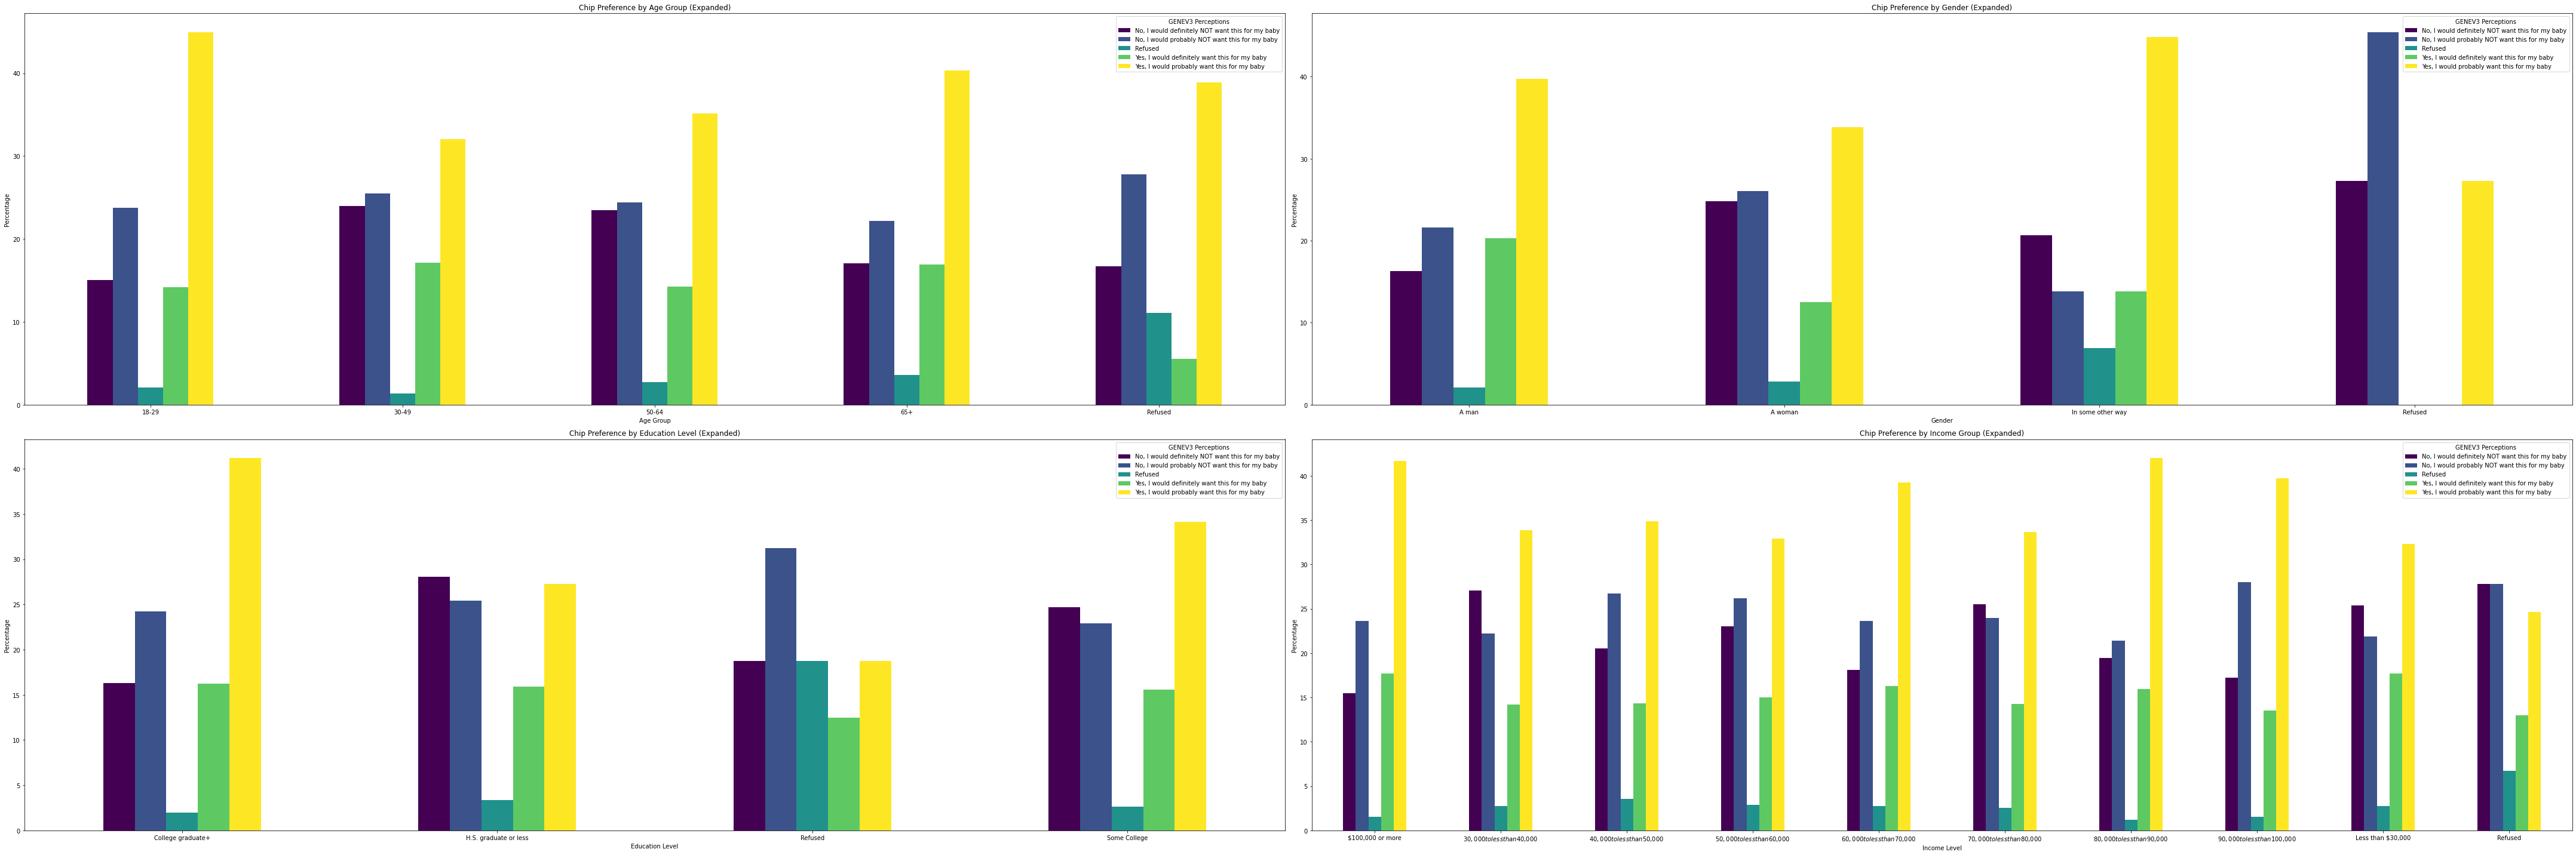

In [26]:
# GENEV3_W99 Analysis

# Analysis by Age
genev3_age_groups_expanded = df_genev.groupby(['F_AGECAT', 'GENEV3_W99']).size().unstack(fill_value=0)
genev3_age_groups_percent_expanded = genev3_age_groups_expanded.div(genev3_age_groups_expanded.sum(axis=1), axis=0) * 100

# Analysis by Gender
genev3_gender_groups_expanded = df_genev.groupby(['F_GENDER', 'GENEV3_W99']).size().unstack(fill_value=0)
genev3_gender_groups_percent_expanded = genev3_gender_groups_expanded.div(genev3_gender_groups_expanded.sum(axis=1), axis=0) * 100

# Analysis by Education
genev3_education_groups_expanded = df_genev.groupby(['F_EDUCCAT', 'GENEV3_W99']).size().unstack(fill_value=0)
genev3_education_groups_percent_expanded = genev3_education_groups_expanded.div(genev3_education_groups_expanded.sum(axis=1), axis=0) * 100

# Analysis by Income Group
genev3_inc_groups_expanded = df_genev.groupby(['F_INC_SDT1', 'GENEV3_W99']).size().unstack(fill_value=0)
genev3_inc_groups_percent_expanded = genev3_inc_groups_expanded.div(genev3_inc_groups_expanded.sum(axis=1), axis=0) * 100

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(60, 20))

# Plot for Age Group
genev3_age_groups_percent_expanded.plot(kind='bar', stacked=False, colormap='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Chip Preference by Age Group (Expanded)')
axes[0, 0].set_xlabel('Age Group')
axes[0, 0].set_ylabel('Percentage')
axes[0, 0].legend(title='GENEV3 Perceptions')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)

# Plot for Gender
genev3_gender_groups_percent_expanded.plot(kind='bar', stacked=False, colormap='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Chip Preference by Gender (Expanded)')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Percentage')
axes[0, 1].legend(title='GENEV3 Perceptions')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)

# Plot for Education Level
genev3_education_groups_percent_expanded.plot(kind='bar', stacked=False, colormap='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Chip Preference by Education Level (Expanded)')
axes[1, 0].set_xlabel('Education Level')
axes[1, 0].set_ylabel('Percentage')
axes[1, 0].legend(title='GENEV3 Perceptions')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0)

# Plot for Income Group
genev3_inc_groups_percent_expanded.plot(kind='bar', stacked=False, colormap='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Chip Preference by Income Group (Expanded)')
axes[1, 1].set_xlabel('Income Level')
axes[1, 1].set_ylabel('Percentage')
axes[1, 1].legend(title='GENEV3 Perceptions')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

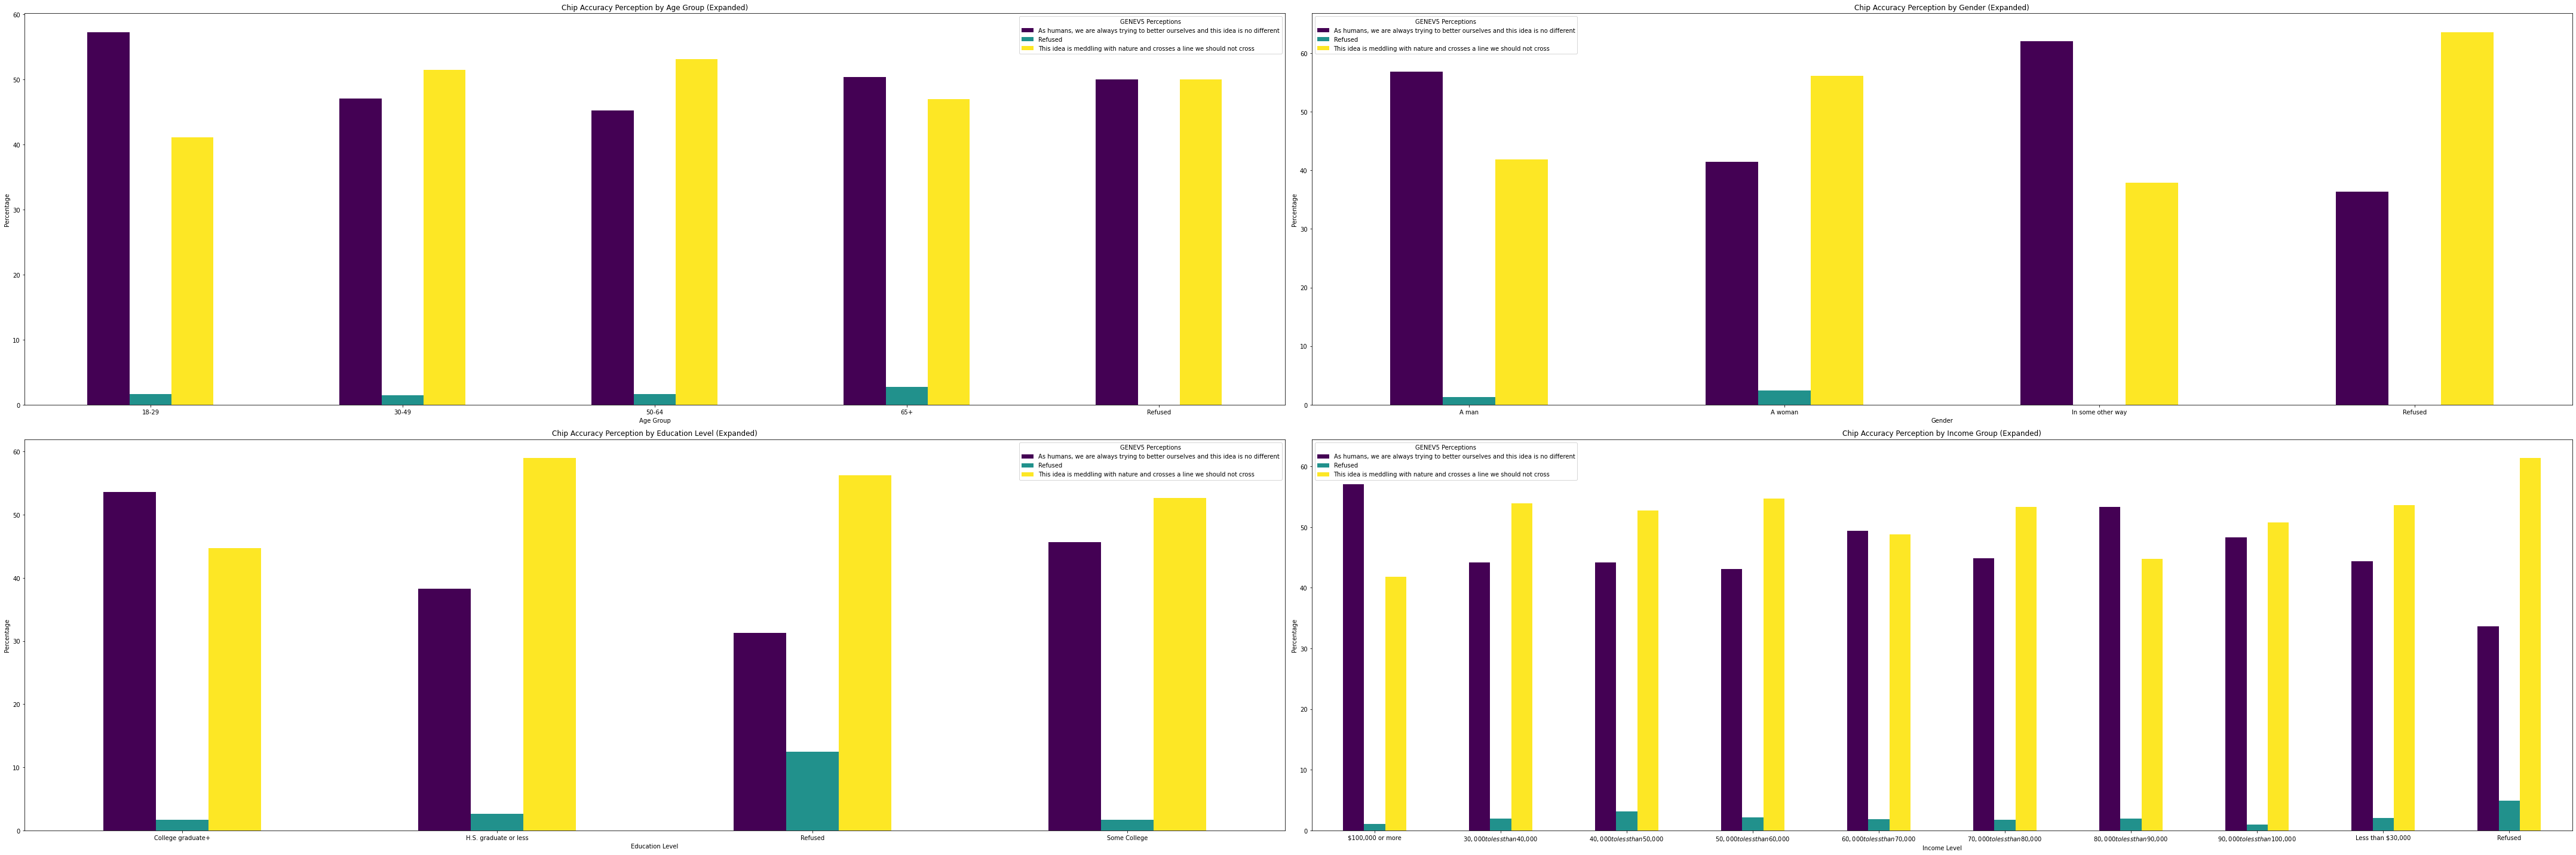

In [27]:
# GENEV5_W99 Analysis

# Analysis by Age
genev5_age_groups_expanded = df_genev.groupby(['F_AGECAT', 'GENEV5_W99']).size().unstack(fill_value=0)
genev5_age_groups_percent_expanded = genev5_age_groups_expanded.div(genev5_age_groups_expanded.sum(axis=1), axis=0) * 100

# Analysis by Gender
genev5_gender_groups_expanded = df_genev.groupby(['F_GENDER', 'GENEV5_W99']).size().unstack(fill_value=0)
genev5_gender_groups_percent_expanded = genev5_gender_groups_expanded.div(genev5_gender_groups_expanded.sum(axis=1), axis=0) * 100

# Analysis by Education
genev5_education_groups_expanded = df_genev.groupby(['F_EDUCCAT', 'GENEV5_W99']).size().unstack(fill_value=0)
genev5_education_groups_percent_expanded = genev5_education_groups_expanded.div(genev5_education_groups_expanded.sum(axis=1), axis=0) * 100

# Analysis by Income Group
genev5_inc_groups_expanded = df_genev.groupby(['F_INC_SDT1', 'GENEV5_W99']).size().unstack(fill_value=0)
genev5_inc_groups_percent_expanded = genev5_inc_groups_expanded.div(genev5_inc_groups_expanded.sum(axis=1), axis=0) * 100

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(60, 20))

# Plot for Age Group
genev5_age_groups_percent_expanded.plot(kind='bar', stacked=False, colormap='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Chip Accuracy Perception by Age Group (Expanded)')
axes[0, 0].set_xlabel('Age Group')
axes[0, 0].set_ylabel('Percentage')
axes[0, 0].legend(title='GENEV5 Perceptions')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)

# Plot for Gender
genev5_gender_groups_percent_expanded.plot(kind='bar', stacked=False, colormap='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Chip Accuracy Perception by Gender (Expanded)')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Percentage')
axes[0, 1].legend(title='GENEV5 Perceptions')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)

# Plot for Education Level
genev5_education_groups_percent_expanded.plot(kind='bar', stacked=False, colormap='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Chip Accuracy Perception by Education Level (Expanded)')
axes[1, 0].set_xlabel('Education Level')
axes[1, 0].set_ylabel('Percentage')
axes[1, 0].legend(title='GENEV5 Perceptions')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0)

# Plot for Income Group
genev5_inc_groups_percent_expanded.plot(kind='bar', stacked=False, colormap='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Chip Accuracy Perception by Income Group (Expanded)')
axes[1, 1].set_xlabel('Income Level')
axes[1, 1].set_ylabel('Percentage')
axes[1, 1].legend(title='GENEV5 Perceptions')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

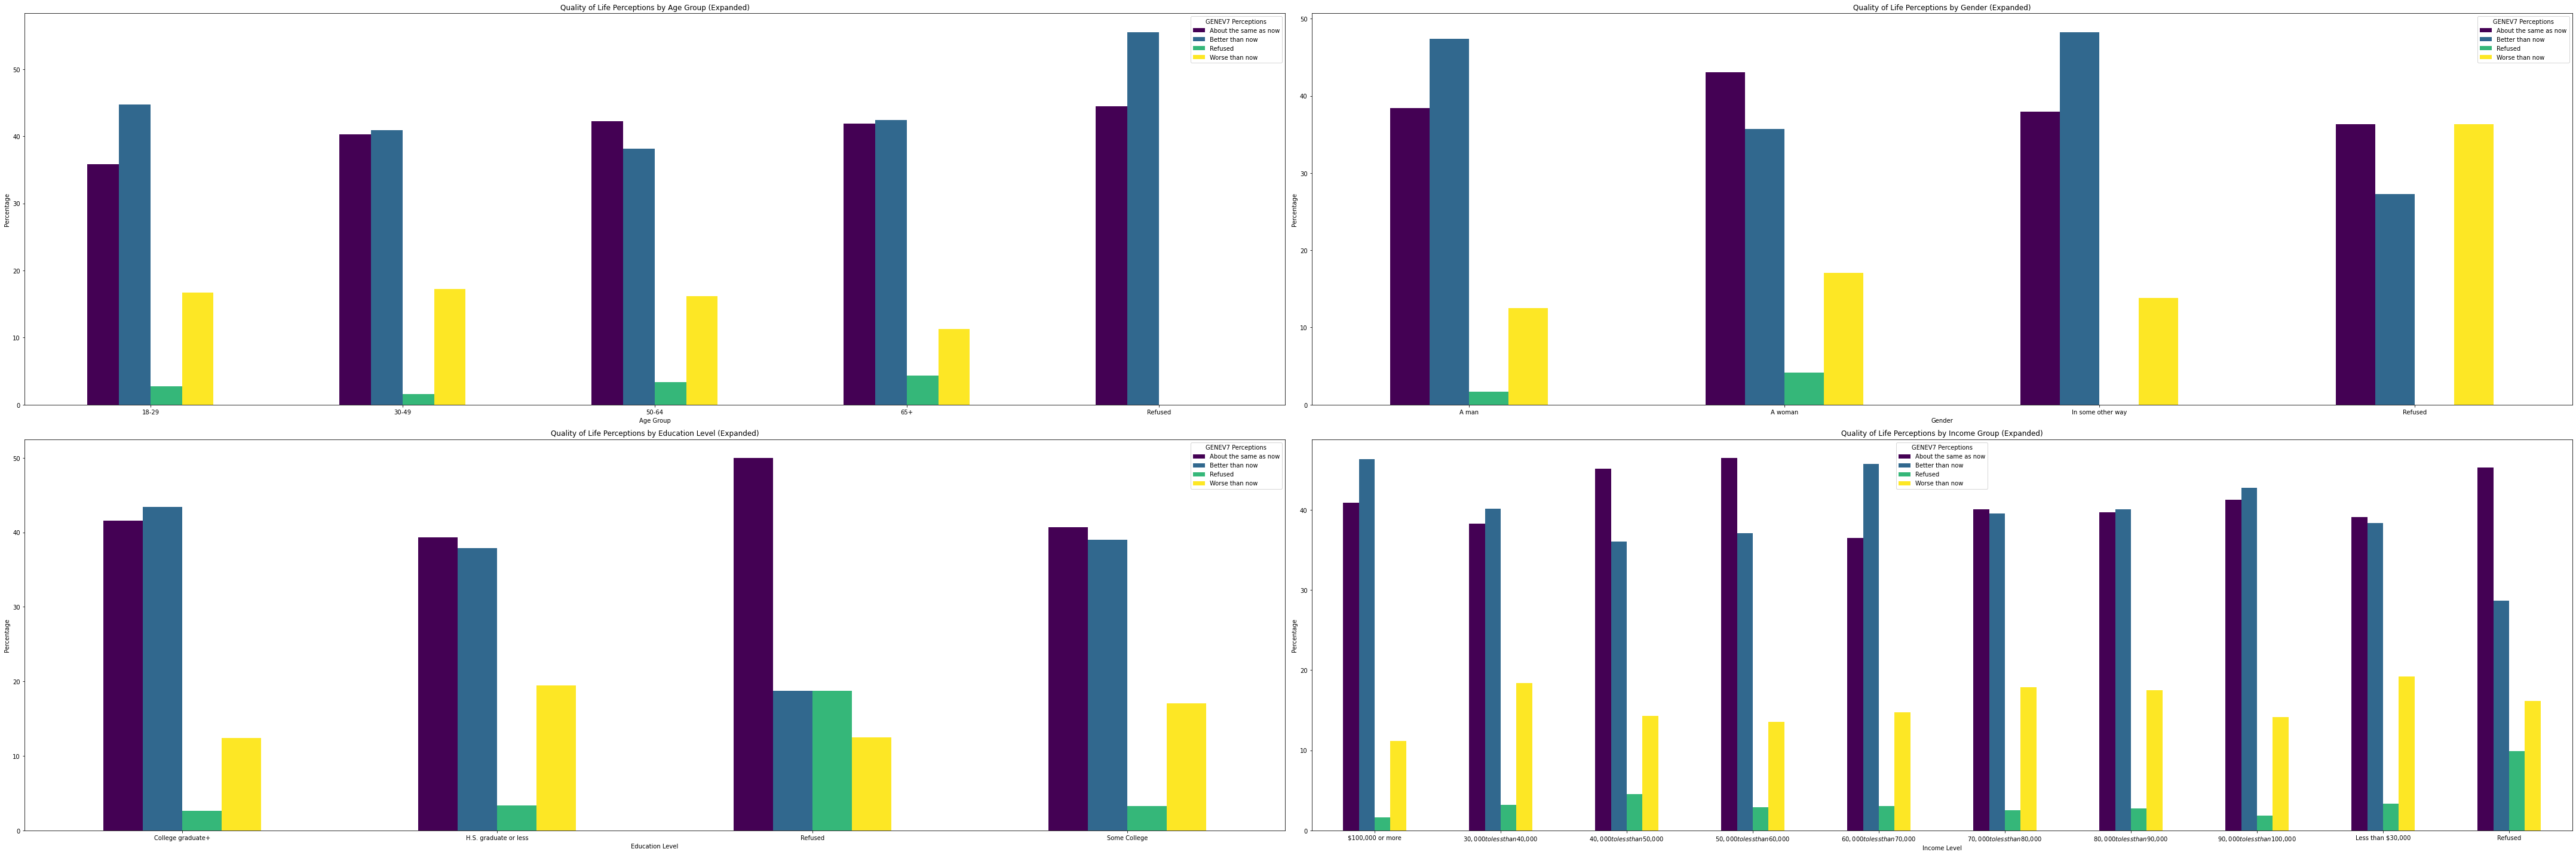

In [28]:
# GENEV7_W99 Analysis

# Analysis by Age
genev7_age_groups_expanded = df_genev.groupby(['F_AGECAT', 'GENEV7_W99']).size().unstack(fill_value=0)
genev7_age_groups_percent_expanded = genev7_age_groups_expanded.div(genev7_age_groups_expanded.sum(axis=1), axis=0) * 100

# Analysis by Gender
genev7_gender_groups_expanded = df_genev.groupby(['F_GENDER', 'GENEV7_W99']).size().unstack(fill_value=0)
genev7_gender_groups_percent_expanded = genev7_gender_groups_expanded.div(genev7_gender_groups_expanded.sum(axis=1), axis=0) * 100

# Analysis by Education
genev7_education_groups_expanded = df_genev.groupby(['F_EDUCCAT', 'GENEV7_W99']).size().unstack(fill_value=0)
genev7_education_groups_percent_expanded = genev7_education_groups_expanded.div(genev7_education_groups_expanded.sum(axis=1), axis=0) * 100

# Analysis by Income Group
genev7_inc_groups_expanded = df_genev.groupby(['F_INC_SDT1', 'GENEV7_W99']).size().unstack(fill_value=0)
genev7_inc_groups_percent_expanded = genev7_inc_groups_expanded.div(genev7_inc_groups_expanded.sum(axis=1), axis=0) * 100

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(60, 20))

# Plot for Age Group
genev7_age_groups_percent_expanded.plot(kind='bar', stacked=False, colormap='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Quality of Life Perceptions by Age Group (Expanded)')
axes[0, 0].set_xlabel('Age Group')
axes[0, 0].set_ylabel('Percentage')
axes[0, 0].legend(title='GENEV7 Perceptions')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)

# Plot for Gender
genev7_gender_groups_percent_expanded.plot(kind='bar', stacked=False, colormap='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Quality of Life Perceptions by Gender (Expanded)')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Percentage')
axes[0, 1].legend(title='GENEV7 Perceptions')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)

# Plot for Education Level
genev7_education_groups_percent_expanded.plot(kind='bar', stacked=False, colormap='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Quality of Life Perceptions by Education Level (Expanded)')
axes[1, 0].set_xlabel('Education Level')
axes[1, 0].set_ylabel('Percentage')
axes[1, 0].legend(title='GENEV7 Perceptions')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0)

# Plot for Income Group
genev7_inc_groups_percent_expanded.plot(kind='bar', stacked=False, colormap='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Quality of Life Perceptions by Income Group (Expanded)')
axes[1, 1].set_xlabel('Income Level')
axes[1, 1].set_ylabel('Percentage')
axes[1, 1].legend(title='GENEV7 Perceptions')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

# Modelling

In [29]:
le = LabelEncoder()

# Preprocess the data
genev_df_encoded = df_genev.apply(le.fit_transform)
bchip_df_encoded = df_bchip.apply(le.fit_transform)

In [30]:
# Define target and features
# Assuming 'GENEV2_W99' and 'BCHIP2_W99' as target columns for genev_df and bchip_df respectively
genev_X = genev_df_encoded.drop('GENEV2_W99', axis=1)
genev_y = genev_df_encoded['GENEV2_W99']

bchip_X = bchip_df_encoded.drop('BCHIP2_W99', axis=1)
bchip_y = bchip_df_encoded['BCHIP2_W99']

In [31]:
# Split the data into training and test sets
genev_X_train, genev_X_test, genev_y_train, genev_y_test = train_test_split(genev_X, genev_y, test_size=0.3, random_state=42)
bchip_X_train, bchip_X_test, bchip_y_train, bchip_y_test = train_test_split(bchip_X, bchip_y, test_size=0.3, random_state=42)

In [32]:
# Define models
log_reg = LogisticRegression(max_iter=1000)
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

In [33]:
# Train and evaluate Logistic Regression
log_reg.fit(genev_X_train, genev_y_train)
genev_y_pred_log_reg = log_reg.predict(genev_X_test)
genev_log_reg_report = classification_report(genev_y_test, genev_y_pred_log_reg, output_dict=True)
genev_log_reg_accuracy = accuracy_score(genev_y_test, genev_y_pred_log_reg)
genev_log_reg_f1 = f1_score(genev_y_test, genev_y_pred_log_reg, average='weighted')
genev_log_reg_recall = recall_score(genev_y_test, genev_y_pred_log_reg, average='weighted')
genev_log_reg_precision = precision_score(genev_y_test, genev_y_pred_log_reg, average='weighted')


log_reg.fit(bchip_X_train, bchip_y_train)
bchip_y_pred_log_reg = log_reg.predict(bchip_X_test)
bchip_log_reg_report = classification_report(bchip_y_test, bchip_y_pred_log_reg, output_dict=True)
bchip_log_reg_accuracy = accuracy_score(bchip_y_test, bchip_y_pred_log_reg)
bchip_log_reg_f1 = f1_score(genev_y_test, genev_y_pred_log_reg, average='weighted')
bchip_log_reg_recall = recall_score(genev_y_test, genev_y_pred_log_reg, average='weighted')
bchip_log_reg_precision = precision_score(genev_y_test, genev_y_pred_log_reg, average='weighted')

C:\Users\kryst\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kryst\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kryst\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision

In [34]:
# Train and evaluate Decision Tree
decision_tree.fit(genev_X_train, genev_y_train)
genev_y_pred_decision_tree = decision_tree.predict(genev_X_test)
genev_decision_tree_report = classification_report(genev_y_test, genev_y_pred_decision_tree, output_dict=True)
genev_decision_tree_accuracy = accuracy_score(genev_y_test, genev_y_pred_decision_tree)
genev_decision_tree_reg_f1 = f1_score(genev_y_test, genev_y_pred_decision_tree, average='weighted')
genev_decision_tree_reg_recall = recall_score(genev_y_test, genev_y_pred_decision_tree, average='weighted')
genev_decision_tree_reg_precision = precision_score(genev_y_test, genev_y_pred_decision_tree, average='weighted')


decision_tree.fit(bchip_X_train, bchip_y_train)
bchip_y_pred_decision_tree = decision_tree.predict(bchip_X_test)
bchip_decision_tree_report = classification_report(bchip_y_test, bchip_y_pred_decision_tree, output_dict=True)
bchip_decision_tree_accuracy = accuracy_score(bchip_y_test, bchip_y_pred_decision_tree)
bchip_decision_tree_reg_f1 = f1_score(bchip_y_test, bchip_y_pred_decision_tree, average='weighted')
bchip_decision_tree_reg_recall = recall_score(bchip_y_test, bchip_y_pred_decision_tree, average='weighted')
bchip_decision_tree_reg_precision = precision_score(bchip_y_test, bchip_y_pred_decision_tree, average='weighted')

In [35]:
# Train and evaluate Random Forest
random_forest.fit(genev_X_train, genev_y_train)
genev_y_pred_random_forest = random_forest.predict(genev_X_test)
genev_random_forest_report = classification_report(genev_y_test, genev_y_pred_random_forest, output_dict=True)
genev_random_forest_accuracy = accuracy_score(genev_y_test, genev_y_pred_random_forest)
genev_random_forest_reg_f1 = f1_score(genev_y_test, genev_y_pred_random_forest, average='weighted')
genev_random_forest_reg_recall = recall_score(genev_y_test, genev_y_pred_random_forest, average='weighted')
genev_random_forest_reg_precision = precision_score(genev_y_test, genev_y_pred_random_forest, average='weighted')


random_forest.fit(bchip_X_train, bchip_y_train)
bchip_y_pred_random_forest = random_forest.predict(bchip_X_test)
bchip_random_forest_report = classification_report(bchip_y_test, bchip_y_pred_random_forest, output_dict=True)
bchip_random_forest_accuracy = accuracy_score(bchip_y_test, bchip_y_pred_random_forest)
bchip_random_forest_reg_f1 = f1_score(bchip_y_test, bchip_y_pred_random_forest, average='weighted')
bchip_random_forest_reg_recall = recall_score(bchip_y_test, bchip_y_pred_random_forest, average='weighted')
bchip_random_forest_reg_precision = precision_score(bchip_y_test, bchip_y_pred_random_forest, average='weighted')

In [36]:
print("Gene Editing")
print("Logistic Regression")
print("  Accuracy:", genev_log_reg_accuracy)
print("  F1 Score:", genev_log_reg_f1)
print("  Recall:", genev_log_reg_recall)
print("  Precision:", genev_log_reg_precision)
print("Decision Tree")
print("  Accuracy:", genev_decision_tree_accuracy)
print("  F1 Score:", genev_decision_tree_reg_f1)
print("  Recall:", genev_decision_tree_reg_recall)
print("  Precision:", genev_decision_tree_reg_precision)
print("Random Forest")
print("  Accuracy:", genev_random_forest_accuracy)
print("  F1 Score:", genev_random_forest_reg_f1)
print("  Recall:", genev_random_forest_reg_recall)
print("  Precision:", genev_random_forest_reg_precision)

Gene Editing
Logistic Regression
  Accuracy: 0.6581865622961514
  F1 Score: 0.6522001664637482
  Recall: 0.6581865622961514
  Precision: 0.6522109956629516
Decision Tree
  Accuracy: 0.5727332028701891
  F1 Score: 0.57241925966023
  Recall: 0.5727332028701891
  Precision: 0.572425049095079
Random Forest
  Accuracy: 0.6960208741030659
  F1 Score: 0.6931823524542351
  Recall: 0.6960208741030659
  Precision: 0.6967516817528634


In [37]:
print("Brain Chip")
print("Logistic Regression")
print("  Accuracy:", bchip_log_reg_accuracy)
print("  F1 Score:", bchip_log_reg_f1)
print("  Recall:", bchip_log_reg_recall)
print("  Precision:", bchip_log_reg_precision)
print("Decision Tree")
print("  Accuracy:", bchip_decision_tree_accuracy)
print("  F1 Score:", bchip_decision_tree_reg_f1)
print("  Recall:", bchip_decision_tree_reg_recall)
print("  Precision:", bchip_decision_tree_reg_precision)
print("Random Forest")
print("  Accuracy:", bchip_random_forest_accuracy)
print("  F1 Score:", bchip_random_forest_reg_f1)
print("  Recall:", bchip_random_forest_reg_recall)
print("  Precision:", bchip_random_forest_reg_precision)

Brain Chip
Logistic Regression
  Accuracy: 0.6979778212654925
  F1 Score: 0.6522001664637482
  Recall: 0.6581865622961514
  Precision: 0.6522109956629516
Decision Tree
  Accuracy: 0.6131767775603392
  F1 Score: 0.6136770896387767
  Recall: 0.6131767775603392
  Precision: 0.6145353847576926
Random Forest
  Accuracy: 0.7103718199608611
  F1 Score: 0.6961770783704581
  Recall: 0.7103718199608611
  Precision: 0.7009395176523955


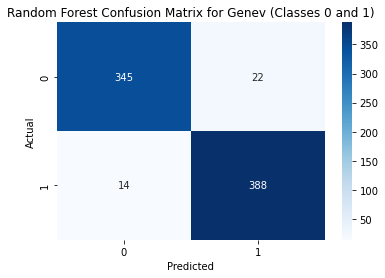

In [38]:
# Plot confusion matrix for Genev: 

rf_cm = confusion_matrix(genev_y_test, genev_y_pred_random_forest)

# Filter the confusion matrix to include only classes 0 and 1
filtered_rf_cm = rf_cm[:2, :2]

# Plot the filtered confusion matrix
sns.heatmap(filtered_rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix for Genev (Classes 0 and 1)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

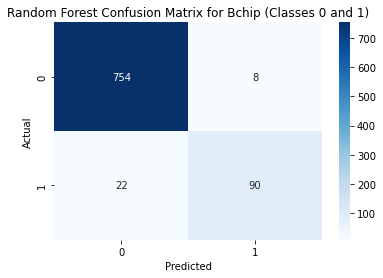

In [39]:
# Plot confusion matrix for BChip: 

rf_cm = confusion_matrix(bchip_y_test, bchip_y_pred_random_forest)

# Filter the confusion matrix to include only classes 0 and 1
filtered_dt_cm = rf_cm[:2, :2]

# Plot the filtered confusion matrix
sns.heatmap(filtered_dt_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix for Bchip (Classes 0 and 1)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

'Bad idea for society' -> 0 
'Good idea for society' -> 1 

In [40]:
# Fit and extract feature importances for Genev data
random_forest_genev = RandomForestClassifier()
random_forest_genev.fit(genev_X_train, genev_y_train)
genev_feature_importances = random_forest_genev.feature_importances_
genev_feature_importances_df = pd.DataFrame({
    'Feature': genev_X.columns,
    'Importance': genev_feature_importances
}).sort_values(by='Importance', ascending=False)

genev_feature_importances_df

,Feature,Importance
57,GENEV3_W99,0.094951
62,GENEV5_W99,0.058908
64,GENEV7_W99,0.037691
87,WEIGHT_W99,0.028800
86,Unnamed: 0,0.025173
...,...,...
14,EXCITEOE_W99_OE2,0.000984
5,CONCERNOE_W99_OE3,0.000680
15,EXCITEOE_W99_OE3,0.000200
16,FORM_W99,0.000000


In [42]:
# Top 5 - Feature importance: top 5 demographics with the highest feature importance scores for Genev model: 

genev_feature_importances_df[genev_feature_importances_df['Feature'].str.contains('F_')]

,Feature,Importance
21,F_CDIVISION,0.015861
30,F_INC_SDT1,0.015380
39,F_PRAY,0.013792
18,F_ATTEND,0.012853
25,F_EDUCCAT2,0.012489
44,F_RELIG,0.011616
36,F_PARTYSUMIDEO_FINAL,0.011403
29,F_IDEO,0.010730
46,F_RELIMP,0.010523
17,F_AGECAT,0.010507


In [41]:
# Fit and extract feature importances for Bchip data
random_forest_bchip = RandomForestClassifier()
random_forest_bchip.fit(bchip_X_train, bchip_y_train)
bchip_feature_importances = random_forest_bchip.feature_importances_
bchip_feature_importances_df = pd.DataFrame({
    'Feature': bchip_X.columns,
    'Importance': bchip_feature_importances
}).sort_values(by='Importance', ascending=False)

bchip_feature_importances_df

,Feature,Importance
14,BCHIP3_W99,0.072495
19,BCHIP5_W99,0.059333
11,BCHIP14_c_W99,0.037636
12,BCHIP14_d_W99,0.026768
91,WEIGHT_W99,0.025554
...,...,...
74,LANG_W99,0.001137
30,CONCERNOE_W99_OE3,0.000633
40,EXCITEOE_W99_OE3,0.000369
41,FORM_W99,0.000000


In [44]:
# Top 5 - Feature importance: top 5 demographics with the highest feature importance scores for Bchip model: 

bchip_feature_importances_df[bchip_feature_importances_df['Feature'].str.contains('F_')]

,Feature,Importance
46,F_CDIVISION,0.015438
55,F_INC_SDT1,0.013923
69,F_RELIG,0.011975
43,F_ATTEND,0.011946
64,F_PRAY,0.011790
50,F_EDUCCAT2,0.010801
61,F_PARTYSUMIDEO_FINAL,0.010587
58,F_MARITAL,0.010355
42,F_AGECAT,0.010309
48,F_CREGION,0.010215
